# Оглавление

* [Загрузка данных. Подготовка к анализу](#start)

    * [Исследование visits](#visits)
    * [Исследование orders](#orders)
    * [Исследование costs](#costs)
    * [Общий вывод](#step1_con)
     
* [Анализ данных](#analysis)
    * [Продукт](#product)
        * [Сколько людей пользуются сервисом в день, неделю, месяц?](#product_q1)
        * [Сколько сессий в день?](#product_q2)
        * [Сколько длится одна сессия?](#product_q3)
        * [Как часто люди возвращаются?](#product_q4)
    * [Продажи](#sales)
        * [Выручка](#sales_q1)
        * [Сколько раз покупают за период?](#sales_q2)
        * [Какой средний чек?](#sales_q3)
        * [Сколько денег приносят? (LTV)](#sales_q4)
        * [Когда начинают покупать?](#sales_q5)
    * [Маркетинг](#marketing)
        * [Сколько денег потратили?](#marketing_q1)
        * [Сколько стоило привлечение одного покупателя из каждого источника?](#marketing_q2)
        * [На сколько окупились расходы? (ROMI)](#marketing_q3)

* [Выводы](#conclusions)

* [Дополнение 1. Исследование в разрезе разных типов устройств](#ad)
    + [Как меняется средний чек](#ad_q1)
    + [Сколько денег приносят (LTV)](#ad_q2)
    + [Выводы](#ad_q3)

## Загрузка данных. Подготовка к анализу <a id="start"></a>

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

Загрузим данные о визитах, заказах и расходах в <code>visits</code>, <code>orders</code> и <code>costs</code>

In [2]:
visits = pd.read_csv('datasets/visits_log.csv')
orders = pd.read_csv('datasets/orders_log.csv')
costs = pd.read_csv('datasets/costs.csv')

Создадим функцию, которая будет отображать общую информацию о датасете и 5 рандомных записей

In [3]:
def data_info(data):
    print(data.info())
    return data.sample(5)

### Исследование visits <a id="visits"></a>

In [4]:
data_info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


,Device,End Ts,Source Id,Start Ts,Uid
57657,desktop,2017-12-22 11:21:00,5,2017-12-22 11:20:00,17255811055491194730
314749,touch,2018-03-06 21:55:00,4,2018-03-06 21:42:00,2032168187979285618
137879,touch,2018-01-13 20:49:00,5,2018-01-13 20:37:00,1268089484620431546
349975,desktop,2017-12-12 18:22:00,2,2017-12-12 18:13:00,7046737606684150807
275417,desktop,2017-11-16 09:31:00,1,2017-11-16 09:27:00,5198629199993698023


**Описание данных таблицы visits**

* Device — категория устройства пользователя
* End Ts — дата и время окончания сессии
* Source Id — идентификатор рекламного источника, из которого пришел пользователь
* Start Ts — дата и время начала сессии
* Uid — уникальный идентификатор пользователя

**Словарь Device**

Проверим все существующие значения в столбце Device

In [5]:
visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

**Словарь Source Id**

Проверим все существующие значения в столбце Source Id

In [6]:
np.sort(visits['Source Id'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10], dtype=int64)

**Явные дубли**

Проверим датасет на наличие явных дублей

In [7]:
visits.duplicated().sum()

0

**Выводы**

* Пропуски и явные дубли в датасете не были обнаружены
* Названия столбцов содержат пробелы и прописные символы. Необходимо изменить названия столбцов
* Столбцы End Ts и Start Ts имеют тип данных object. Необходимо изменить тип данных столбцов на datetime64
* Категории анализируемых устройств: desktop и touch
* Каждый источник имеет свой идентификатор (число) от 1 до 10, кроме пропущеного под номером 8. Надо сообщить об этом маркетологам и тем, кто предоставил выгрузку. Возможно, что тут есть какая-то ошибка

Исправим неверный тип данных в столбцах End Ts и Start Ts. Затем изменим названия столбцов

In [8]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='%Y-%m-%d %H:%M:%S')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')

In [9]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

Проверим результат

In [10]:
data_info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


,device,end_ts,source_id,start_ts,uid
70377,desktop,2017-12-06 12:51:00,5,2017-12-06 12:48:00,3072010350885042608
314335,desktop,2018-02-17 11:29:00,4,2018-02-17 11:28:00,10087326725339827192
57989,desktop,2017-11-14 16:01:00,1,2017-11-14 15:58:00,15141336586528897062
15765,touch,2017-10-17 12:31:00,3,2017-10-17 12:22:00,2703976839767701805
133907,touch,2017-10-05 09:21:00,4,2017-10-05 09:18:00,156766905406052938


Типы данных и названия столбцов исправлены

**Проверка данных на логику**

Очевидно, что время начала сессии должно быть меньше, чем дата окончания. Проверим есть ли записи, для которых время начала больше времени окончания

In [11]:
visits.query('start_ts > end_ts')['uid'].count()

2

Таких записей 2. Проверим сколько "нулевых" сессий содержится в таблице

In [12]:
visits.query('start_ts == end_ts')['uid'].count()

35794

Практически 36 тысяч. Из датасета удалим 2 визита, для которых явно нарушается логика. Инфрмацию о наличии "нулевых" сессий будем держать в голове

In [13]:
visits = visits.query('start_ts <= end_ts')

### Исследование orders <a id="orders"></a>

In [14]:
data_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,Buy Ts,Revenue,Uid
19727,2017-11-24 20:48:00,6.11,13792744723483215498
29258,2018-01-13 17:39:00,2.44,10611959443464702923
44648,2018-04-19 12:02:00,4.03,11255273999964620637
34530,2018-02-13 13:22:00,0.37,17990165273009472033
8789,2017-09-23 18:20:00,2.44,11920452646463905188


**Описание данных таблицы orders**

* Buy Ts — дата и время заказа
* Revenue — выручка Яндекс.Афиши с этого заказа
* Uid — уникальный id пользователя, который сделал заказ

**Явные дубли**

Проверим датасет на наличие явных дублей

In [15]:
orders.duplicated().sum()

0

**Вывод**

* Пропусков и явных дублей в таблице не обнаружено
* Названия столбцов содержат пробелы и прописные символы. Необходимо изменить названия столбцов
* Столбец Buy Ts имеет тип данных object. Необходимо изменить тип данных столбца на datetime64

Исправим неверный тип данных в Buy Ts и названия столбцов

In [16]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')

In [17]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

Проверим результат

In [18]:
data_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


,buy_ts,revenue,uid
24713,2017-12-18 13:40:00,6.72,9871005794838534095
4411,2017-07-26 08:26:00,1.83,17422966992609087444
32106,2018-01-31 18:01:00,0.73,5972769920732957380
21413,2017-12-01 18:25:00,3.05,9879401608717027428
8545,2017-09-21 18:04:00,17.11,2473481122662286878


### Исследование costs <a id="costs"></a>

In [19]:
data_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,dt,costs
1954,9,2017-10-17,22.27
738,3,2017-06-13,45.73
1941,9,2017-10-04,23.73
765,3,2017-07-10,243.38
2404,10,2018-01-12,18.60


**Описание данных таблицы costs**

* source_id — идентификатор рекламного источника
* dt — дата
* costs — затраты на этот рекламный источник в этот день

**Словарь source_id**

Проверим все существующие значения в столбце Source Id

In [20]:
np.sort(costs['source_id'].unique())

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

**Явные дубли**

Проверим датасет на наличие явных дублей

In [21]:
costs.duplicated().sum()

0

**Вывод**

* Пропуски и явные дубли в таблице отсутствуют
* Столбец dt имеет тип данных object. Необходимо изменить тип на datetime64
* Для источников 6 и 7, существующих в visits, отсутствуют затраты costs. Могут ли они ничего не стоить или есть какая-то ошибка - не знаю. Надо спросить маркетологов в чем тут дело

Исправим тип данных в dt

In [22]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

Проверим результат

In [23]:
data_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


,source_id,dt,costs
1715,5,2018-02-19,236.22
1890,9,2017-08-14,16.25
1479,5,2017-06-28,60.32
1580,5,2017-10-07,209.63
958,3,2018-01-19,784.57


### Интервалы дат

На всякий случай проверим интервалы анализируемых дат

In [24]:
# ф-ия определения минимальной и максимальной дат в series
def min_max_func(series):
    print('Min:', series.min())
    print('Max:', series.max())

# список интересующих столбцов
date_data_list = [visits['start_ts'], visits['end_ts'], orders['buy_ts'], costs['dt']]

for el in date_data_list:
    print(el.name)
    min_max_func(el)
    print()

start_ts
Min: 2017-06-01 00:01:00
Max: 2018-05-31 23:59:00

end_ts
Min: 2017-06-01 00:02:00
Max: 2018-06-01 01:26:00

buy_ts
Min: 2017-06-01 00:10:00
Max: 2018-06-01 00:02:00

dt
Min: 2017-06-01 00:00:00
Max: 2018-05-31 00:00:00



Интервалы дат совпадают

### Общий вывод <a id="step1_con"></a>

* В таблицах visits, orders и costs содержатся данные о визитах пользователей сервиса Яндекс.Афиша, заказах и расходах на маркетинг соответственно с июня 2017 по конец мая 2018 года
* В таблицах нет пропусков и явных дублей
* В таблице visits есть "нулевые" сессии. Стоить иметь это в виду
* В таблице visits отсутствуют данные по 8 источнику. Необходимо уточнить причину пропуска у маркетологов/разработчиков
* В таблице costs отсутствуют данные по 6 и 7 источнику. Необходимо уточнить причины пропусков у маркетологов/разработчиков

## Анализ данных <a id="analysis"></a>

### Продукт <a id="product"></a>

В разрезе продукта исследуем:

* Сколько людей пользуются сервисом в день, неделю, месяц?
* Сколько сессий в день?
* Сколько длится одна сессия?
* Как часто люди возвращаются?

**Сколько людей пользуются сервисом в день, неделю, месяц?** <a id="product_q1"></a>

Для этого нам понадобится таблица visits. Создадим дополнительные столбцы с днем, неделей и месяцем совершаемых визитов. С помощью этих столбцов сгруппируем данные и посчитаем число уникальных пользователей

In [25]:
visits['start_day'] = visits['start_ts'].astype('datetime64[D]')
visits['start_week'] = visits['start_ts'].astype('datetime64[W]')
visits['start_month'] = visits['start_ts'].astype('datetime64[M]')

In [26]:
visits.head()

,device,end_ts,source_id,start_ts,uid,start_day,start_week,start_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01


На подобные метрики роста интересно смотреть в динамике. Вероятнее всего данные с дневным кол-вом пользователей будут шумные - проверим это

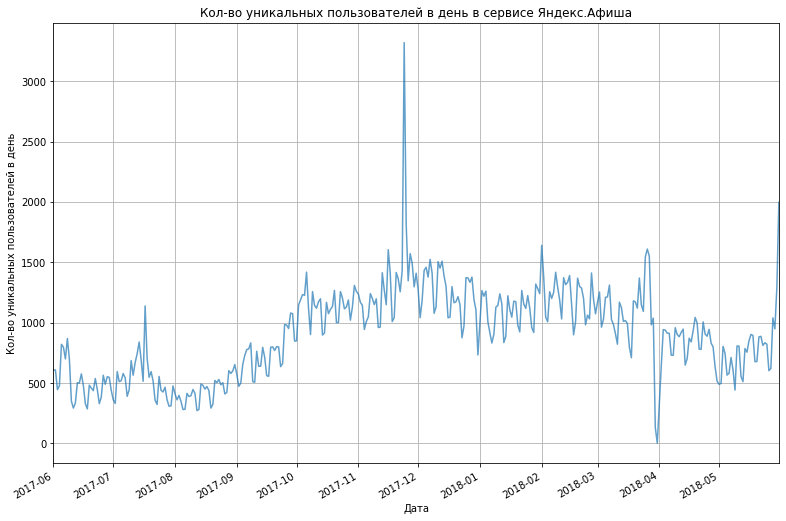

In [27]:
visits_freq = visits.groupby('start_day')['uid'].nunique()

visits_freq.plot(
    kind='line',
    figsize=(13, 9),
    alpha=.7,
    grid=True
)

plt.title('Кол-во уникальных пользователей в день в сервисе Яндекс.Афиша')
plt.xlim(visits_freq.index.min(), visits_freq.index.max())
plt.xlabel('Дата')
plt.ylabel('Кол-во уникальных пользователей в день')
plt.show()

Метрика является шумной. Теперь сгруппируем данные за неделю и месяц и построим графики

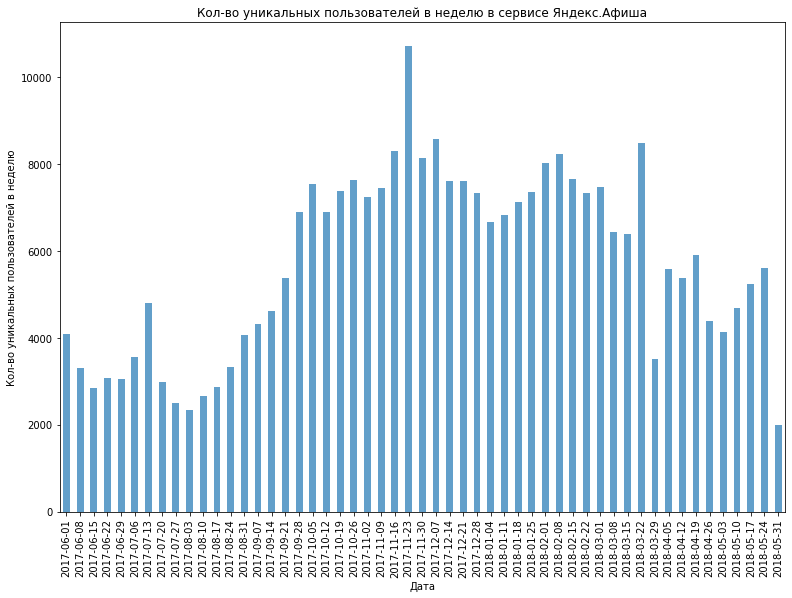

In [28]:
visits_freq = visits.groupby('start_week')['uid'].nunique()

visits_freq.index = visits_freq.index.strftime('%Y-%m-%d')

visits_freq.plot(
    kind='bar',
    figsize=(13, 9),
    alpha=.7
)

plt.title('Кол-во уникальных пользователей в неделю в сервисе Яндекс.Афиша')
plt.xlabel('Дата')
plt.ylabel('Кол-во уникальных пользователей в неделю')
plt.show()

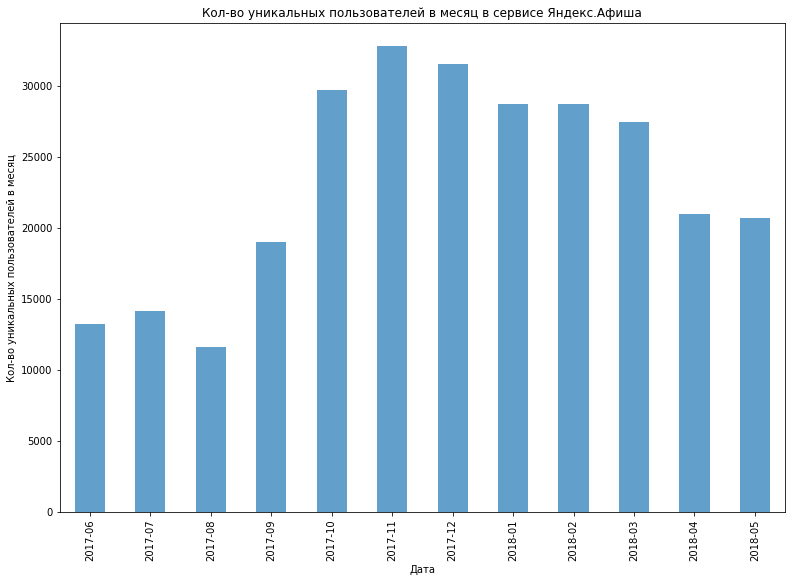

In [29]:
visits_freq = visits.groupby('start_month')['uid'].nunique()

visits_freq.index = visits_freq.index.strftime('%Y-%m')

visits_freq.plot(
    kind='bar',
    figsize=(13, 9),
    alpha=.7
)

plt.title('Кол-во уникальных пользователей в месяц в сервисе Яндекс.Афиша')
plt.xlabel('Дата')
plt.ylabel('Кол-во уникальных пользователей в месяц')
plt.show()

С помощью данных диаграмм можно выделить период высокой пользовательской активности с октября 2017 по март 2018 относительно оставшихся периодов. Возможно, что период высокой активности связан с сезонностью - больше выступлений артистов и актеров, большее число премьер новых фильмов происходит с осени по весну, а ближе к лету и летом активность снижается - все едут отдыхать

На недельном графике заметно увеличение числа пользователей в конце ноября 2017 и в конце мая 2018. Скорее всего в эти недели в Афише происходило что-то интересное - продавали билеты на какие-то супер популярные выступления/фесты или были большие скидки на билеты 

На дневном графике можно заметить просадку в 0 уникальных пользователей в конце марта 2018 - сервис был недоступен для пользователей или это была ошибка сбора данных (а может что-то ещё) - стоит спросить об этом маркетологов/разработчиков

Теперь интересно взглянуть как распределены пользователи в разрезе не только дат, но и типов устройств и источников привлечения трафика. Для этого для каждой единицы группировки по дате будем также разделять данные по устройствам и номерам источников. Отображать информацию будем с помощью stackplot

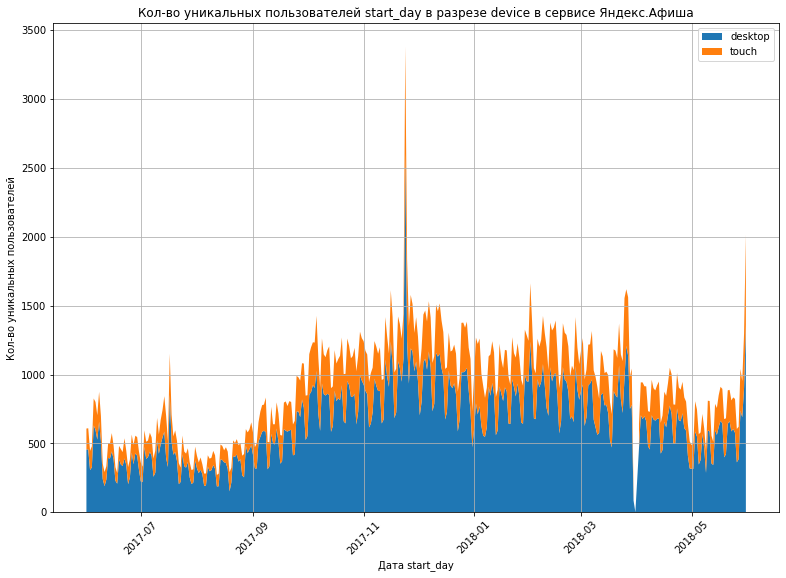

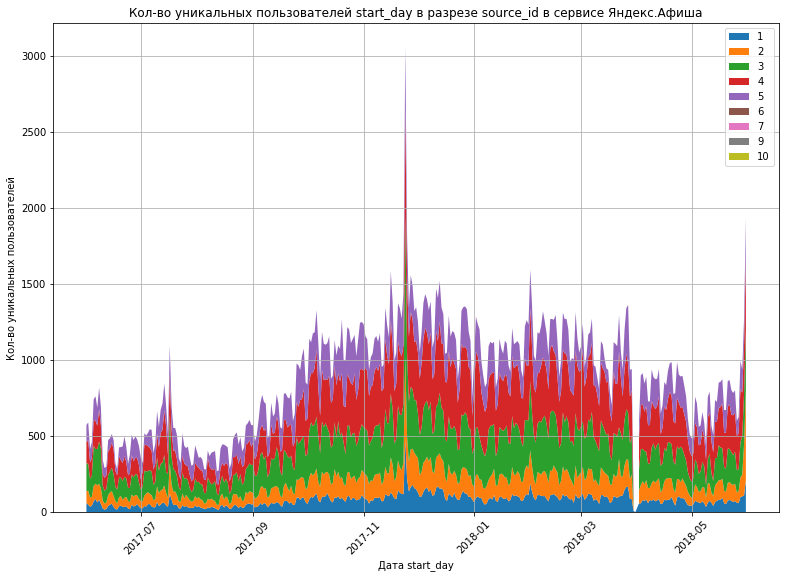

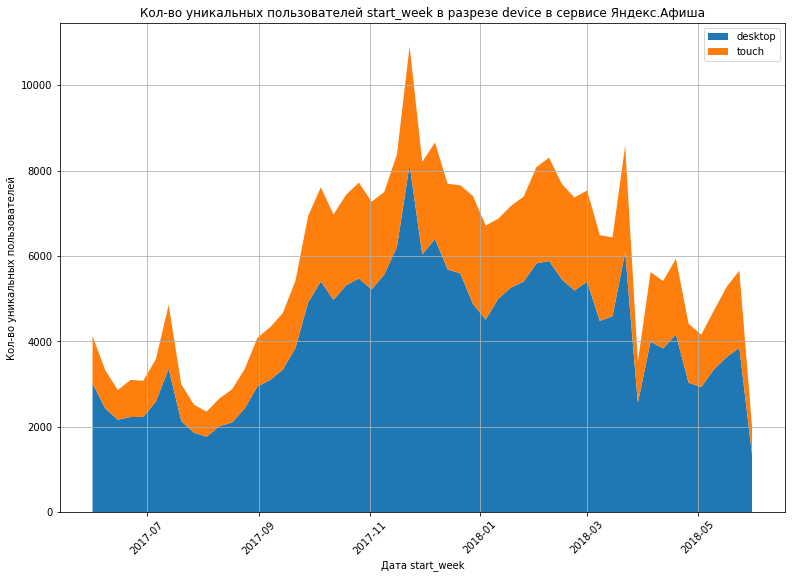

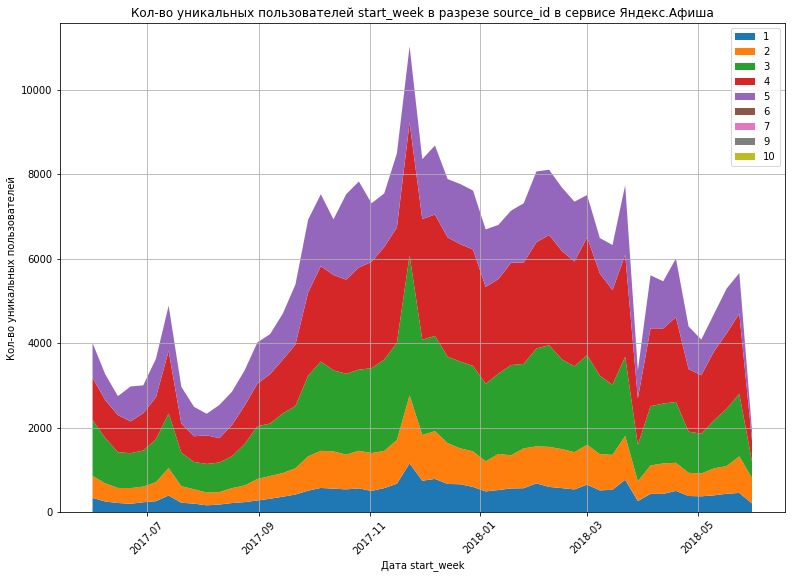

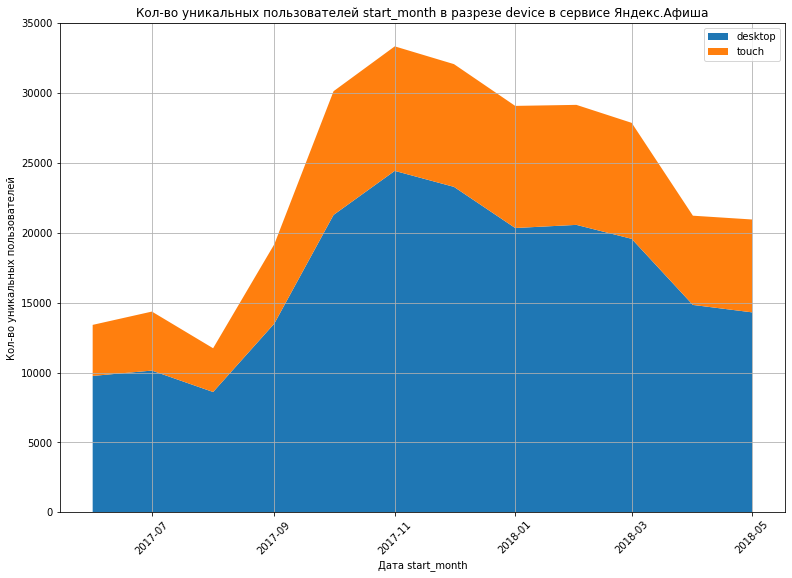

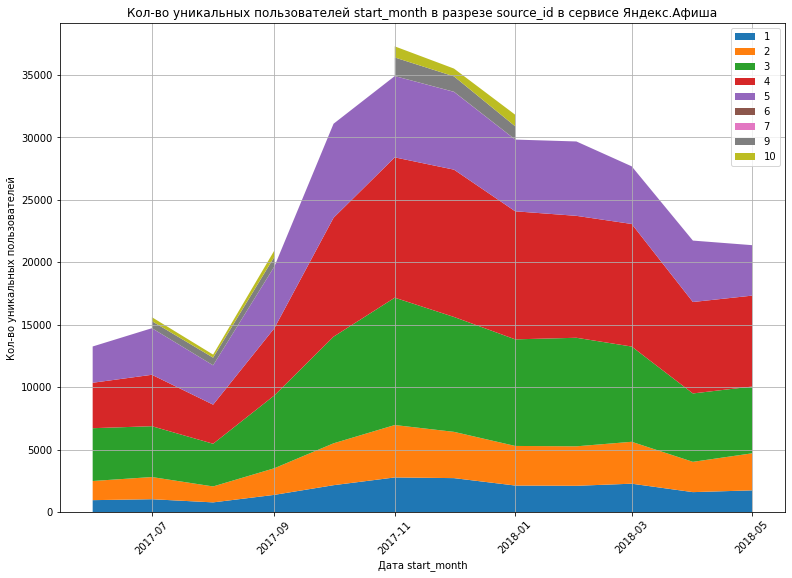

In [30]:
# временной период группировки
index_var = visits.columns[-3:].tolist()

# типы устройств
columns_var = ['device', 'source_id']

for index in index_var:
    for columns in columns_var:
        # формируем датафрейм
        visits_freq = visits.pivot_table(
            index=index,
            values='uid', columns=columns,
            aggfunc='nunique'
        ).reset_index()
        
        # строим stackplot
        plt.figure(figsize=(13, 9))
        
        plt.title('Кол-во уникальных пользователей ' + index + ' в разрезе ' + columns + ' в сервисе Яндекс.Афиша')
        plt.xlabel('Дата ' + index)
        plt.xticks(rotation=45)
        plt.ylabel('Кол-во уникальных пользователей')

        plt.stackplot(
            visits_freq[visits_freq.columns[0]],
            visits_freq[visits_freq.columns[1:]].transpose().values,
            labels=visits_freq.columns[1:]
        )
        
        plt.grid(True)
        plt.legend()
        plt.show()

Среди пользователей преобладающей платформой является desktop

Преобладающим источником уникальных юзеров является 4ый. Соразмерные ему - 3 и 5. 1 и 2 источники - меньшие по объему, но играют существенную роль в общем объеме

Источники 6 и 7 отсутствуют на графиках. По всей видимости они бесплатные (т.к. информации о них нет в <code>costs</code>) и приводят небольшое кол-во пользователей в сервис

Источники 9 и 10 заметны только при месячной группировки в периоды с 2017-07 по 2017-09 и 2017-11 по 2018-1. Возможно, что эти источники тестировались или их вклад заметен только в эти 2 периода

Если ответ необходим в числовом виде, т.е. "X человек пользовались сервисом с Y по Z", то я предлагаю следующий инструмент:

In [31]:
# впишите интересующий диапазон дат в start_visit_day и finish_visit_day
start_visit_day = datetime.datetime(year=2017, month=9, day=7)
finish_visit_day = datetime.datetime(year=2017, month=9, day=13)

if (
        visits['start_day'].min() <= start_visit_day <= visits['start_day'].max()
        and visits['start_day'].min() <= finish_visit_day <= visits['start_day'].max()
        and start_visit_day <= finish_visit_day
    ):
    print(
        visits.query('@start_visit_day <= start_day <= @finish_visit_day')['uid'].nunique(),
        'человек пользовались сервисом с',
        start_visit_day.strftime('%Y-%m-%d'),
        'по',
        finish_visit_day.strftime('%Y-%m-%d')
    )
else:
    print('Проверьте введенные даты')

4311 человек пользовались сервисом с 2017-09-07 по 2017-09-13


**Сколько сессий в день?** <a id="product_q2"></a>

Для ответа на вопрос можно предоставить функционал, который поможет определить кол-во сессий в определенный день, а также сгруппировать данные по дням, неделям и месяцам и построить в динамике:

* Среднее число сессий в день в неделю
* Среднее число сессий в день в месяц

Предварительно у маркетологов нужно выяснить, что для них является визитом (сессией) и точно ли каждая запись из таблицы <code>visits</code> (в особенности нулевые сессии) ему соответствует? В исследовании будем считать, что каждая запись в таблице visits - визит. Для дальнейшей работы будет удобно выделить построение столбчатой диаграммы в отдельную функцию

In [32]:
# построение bar
def bar_data_plot(data, bar_title, bar_xlabel, bar_ylabel):
    data.index = np.arange(0, len(data.index))
    data.plot(kind='bar', figsize=(13, 9), alpha=.7)
    
    plt.title(bar_title)
    plt.xlabel(bar_xlabel)
    plt.ylabel(bar_ylabel)
    plt.xticks(rotation=360);

Начнем с функционала по определению числа сессий в день:

In [33]:
# впишите интересующую дату в visit_day
visit_day = datetime.datetime(year=2017, month=9, day=7)

if visits['start_day'].min() <= visit_day <= visits['start_day'].max():
    print(
        visit_day.strftime('%Y-%m-%d'),
        'было',
        visits.query('start_day == @visit_day')['uid'].count(),
        'сессий'
    )
else:
    print('Проверьте введенную дату')

2017-09-07 было 845 сессий


Перейдем к группировке: первый groupby группирует данные по дням и неделям с подсчетом числа визитов в этот день. 2ой groupby группирует данные по неделям и вычисляет среднее значение дневных визитов

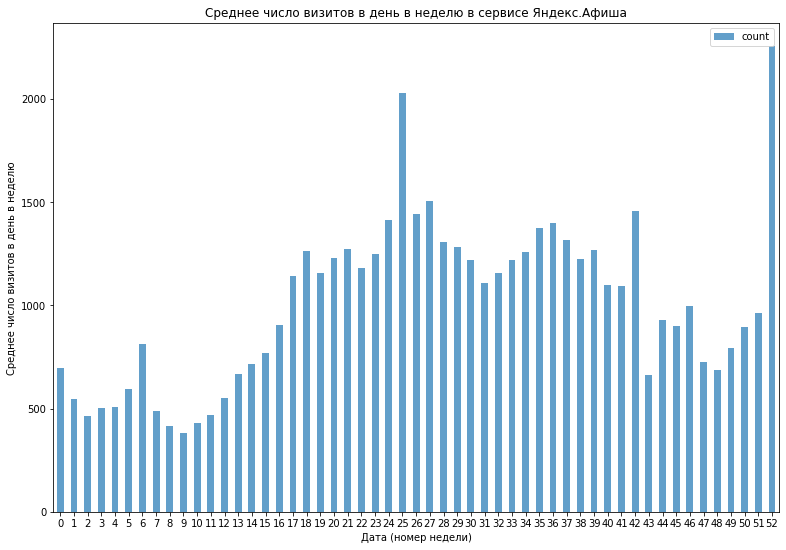

In [34]:
bar_data_plot(
    visits.groupby(['start_week', 'start_day'])['uid'].agg(['count']).groupby(['start_week']).agg('mean'),
    'Среднее число визитов в день в неделю в сервисе Яндекс.Афиша',
    'Дата (номер недели)',
    'Среднее число визитов в день в неделю'
)

Аналогичный график, только дни и недели меняются на дни и месяцы соответственно

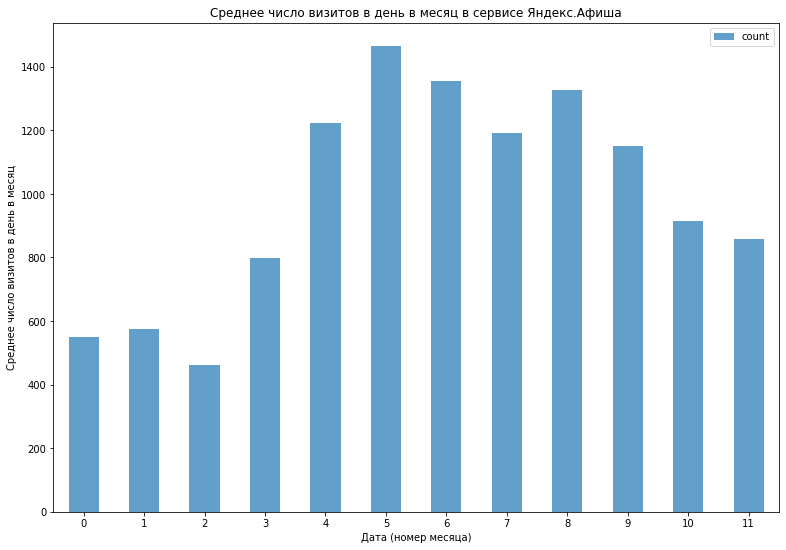

In [35]:
bar_data_plot(
    visits.groupby(['start_month', 'start_day'])['uid'].agg(['count']).groupby(['start_month']).agg('mean'),
    'Среднее число визитов в день в месяц в сервисе Яндекс.Афиша',
    'Дата (номер месяца)',
    'Среднее число визитов в день в месяц'
)

На графике 'Среднее число визитов в день в неделю' получили очень интересный пик в последнюю анализируемую неделю. Взглянем на хвост сгруппированных данных

In [36]:
visits.groupby(['start_week', 'start_day'])['uid'].agg(['count']).tail(10)

count
start_week start_day        
2018-05-17 2018-05-22    943
           2018-05-23    894
2018-05-24 2018-05-24    907
           2018-05-25    886
           2018-05-26    655
           2018-05-27    672
           2018-05-28   1156
           2018-05-29   1035
           2018-05-30   1410
2018-05-31 2018-05-31   2256

В последнюю анализируемую неделю входит один день - 31 мая 2018. День отличается высокой активностью - 2256 визитов. Отсюда и высокое значение среднего кол-ва визитов в день в эту неделю

В целом графики среднего кол-ва сессий в день отражают выделенный ранее период высокой активности с октября 2017 по март 2018

**Сколько длится одна сессия?** <a id="product_q3"></a>

Длительность сессии - разность времен между окончанием сессии и её началом. Вычислим это значение в отдельный столбец таблицы <code>visits</code>

In [37]:
visits['duration_ts'] = ((visits['end_ts'] - visits['start_ts']) / np.timedelta64(1, 's')).round().astype('int')

In [38]:
visits.head()

,device,end_ts,source_id,start_ts,uid,start_day,start_week,start_month,duration_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0


Вспомним, что в датасете существуют "нулевые" визиты. Исключим их из анализа

In [39]:
visits_duration = visits.query('duration_ts > 0')

Построим боксплот длительности пользовательских сессий

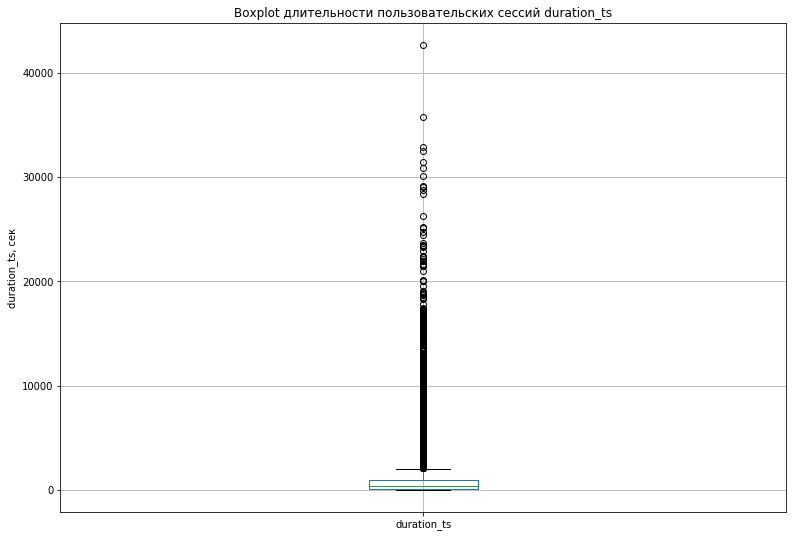

In [40]:
visits_duration.boxplot(
    column='duration_ts', grid=True, figsize=(13, 9)
)

plt.title('Boxplot длительности пользовательских сессий duration_ts')
plt.ylabel('duration_ts, сек')
plt.show()

Видно, что датафрейм содержит "длинные" сессии. Взглянем на числовое описание данных

In [41]:
visits_duration['duration_ts'].describe()

count    323604.000000
mean        714.169516
std        1026.349417
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: duration_ts, dtype: float64

Бросается в глаза факт, что множество значений в числовом описании кратны 60. Возможно, что данные о длительности округляются с точностью до минуты. Если это так, то выброс нулевых сессий - плохое решение (если пользователь провел в сервисе меньше минуты, то это не означает, что он не потратил на сервис время: его end_ts будет округлен вниз и сессия получится псевдонулевой). Проверим это, построив гистограмму от 0 до 900 секунд

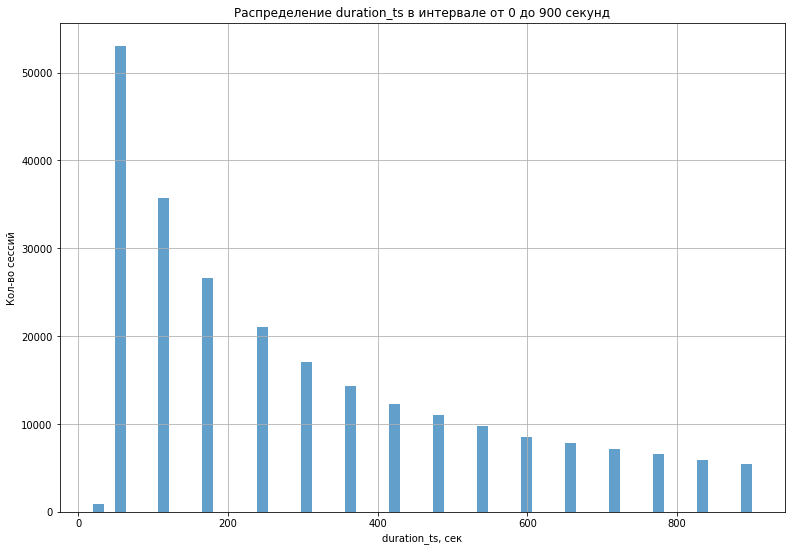

In [42]:
visits_duration.query('duration_ts <= 900')['duration_ts'].hist(bins=60, figsize=(13, 9), alpha=.7)

plt.title('Распределение duration_ts в интервале от 0 до 900 секунд')
plt.xlabel('duration_ts, сек')
plt.ylabel('Кол-во сессий')
plt.show()

Да, данные кратны 1ой минуте. Для удобства переопределим время сессии с точностью до минут

In [43]:
visits['duration_ts'] = ((visits['end_ts'] - visits['start_ts']) / np.timedelta64(1, 'm')).round().astype('int')

Вычислим числовое описание данных времени сессии

In [44]:
visits['duration_ts'].describe()

count    359398.000000
mean         10.716607
std          16.618906
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: duration_ts, dtype: float64

Построим гистограмму с duration_ts <= 15

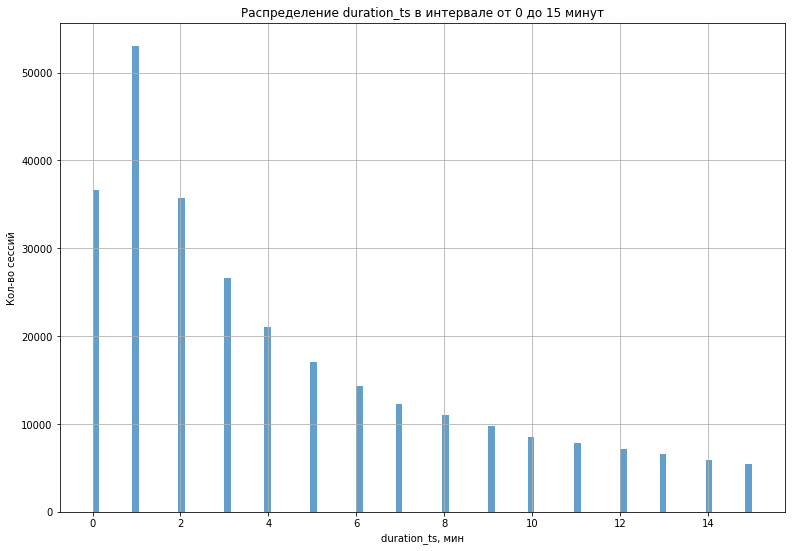

In [45]:
visits.query('duration_ts <= 15')['duration_ts'].hist(bins=100, figsize=(13, 9), alpha=.7)

plt.title('Распределение duration_ts в интервале от 0 до 15 минут')
plt.xlabel('duration_ts, мин')
plt.ylabel('Кол-во сессий')
plt.show()

Предлагаю каким-то образом разбить визиты на группы, к примеру на "быстрые", "средние" и "долгие" по критериям:

* "быстрые" - до 2 минут (включительно)
* "средние" - от 2 до 14 минут (включительно)
* "долгие" - более 14 минут

Для "быстрых" визитов предлагаю среднее время визита определить модой, для "средних" время сесии оценить средним значением, а для "долгих" - медианным:

In [46]:
print('Длительность "быстрых" визитов:', visits.query('duration_ts <= 2')['duration_ts'].mode()[0])
print('Длительность "средних" визитов:', round(visits.query('2 < duration_ts <= 14')['duration_ts'].mean(), 2))
print('Длительность "долгих" визитов:', visits.query('14 < duration_ts')['duration_ts'].median())

Длительность "быстрых" визитов: 1
Длительность "средних" визитов: 6.9
Длительность "долгих" визитов: 25.0


P.S. также я смотрел время сессии в разрезе разны платформ, но случайно всё удалил, потом много чего добавил и только потом всё это осознал. В целом - никаких различий в длительности сессии для разных платформ обнаружено не было

**Как часто люди возвращаются?** <a id="product_q4"></a>

Для определения возвращаемости определим дату и время первой сессии пользователя и объединим её с <code>visits</code>

In [47]:
first_visits = visits.groupby('uid')['start_ts'].min()
first_visits.name = 'first_visit_date'

visits = visits.join(first_visits, on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,start_day,start_week,start_month,duration_ts,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,18,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,28,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,24,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0,2017-12-27 14:06:00


Выделим из даты первой сессии месяц

In [48]:
visits['first_activity_month'] = visits['first_visit_date'].astype('datetime64[M]')

visits.head()

,device,end_ts,source_id,start_ts,uid,start_day,start_week,start_month,duration_ts,first_visit_date,first_activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,18,2017-12-20 17:20:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,28,2018-02-19 16:53:00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,24,2018-03-09 20:05:00,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0,2017-12-27 14:06:00,2017-12-01


Рассчитаем месячный lifetime - номер активного месяца относительно первого месяца "жизни" в сервисе

In [49]:
visits['lifetime'] = ((visits['start_month'] - visits['first_activity_month']) / np.timedelta64(1, 'M')).round().astype('int')

visits.head()

,device,end_ts,source_id,start_ts,uid,start_day,start_week,start_month,duration_ts,first_visit_date,first_activity_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,18,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,28,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,24,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0,2017-12-27 14:06:00,2017-12-01,0


Сгруппируем данные по месяцу первой активности и lifetime, а определяемым параметром будет уникальное число пользователей

In [50]:
visits_retention = visits.groupby(['first_activity_month', 'lifetime']).agg({'uid':'nunique'}).reset_index()

visits_retention.head()

,first_activity_month,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Найдём исходное количество пользователей в когорте. Для этого возьмём их число на нулевую неделю

In [51]:
initial_users_count = visits_retention.query('lifetime == 0')[['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

initial_users_count.head()

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Объединим <code>visits_retention</code> и <code>initial_users_count</code>

In [52]:
visits_retention = visits_retention.merge(initial_users_count, on='first_activity_month')

visits_retention.head()

,first_activity_month,lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Осталось определить возвращаемость: отношение числа пользователей в определенный lifetime к общему числу пользователей в когорте (т.е. на нулевой lifetime)

In [53]:
visits_retention['retention'] = visits_retention['uid'] / visits_retention['cohort_users']

visits_retention.head()

,first_activity_month,lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


Наконец построим сводную таблицу

In [54]:
pivot_visits_retention = visits_retention.query('lifetime > 0').pivot_table(
    index='first_activity_month',
    columns='lifetime',
    values='retention',
    aggfunc='sum'
)

Для нормального отображения подписей преобразуем индексы в строки с заданным форматом

In [55]:
pivot_visits_retention.index = pivot_visits_retention.index.strftime('%Y-%m')

pivot_visits_retention.round(4).fillna(' ')

lifetime,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,
2017-06,0.0787,0.0538,0.0614,0.0686,0.0714,0.061,0.0578,0.0523,0.0508,0.0407,0.045
2017-07,0.0561,0.0513,0.0562,0.0582,0.0482,0.0454,0.0457,0.0388,0.0286,0.0275,
2017-08,0.0769,0.0629,0.0628,0.0501,0.044,0.0363,0.0395,0.0279,0.026,,
2017-09,0.0855,0.0692,0.0507,0.0394,0.0378,0.0359,0.0242,0.0228,,,
2017-10,0.0786,0.0522,0.039,0.0343,0.0322,0.0214,0.0204,,,,
2017-11,0.0783,0.0441,0.0387,0.0337,0.0234,0.0218,,,,,
2017-12,0.0558,0.038,0.0311,0.0203,0.019,,,,,,
2018-01,0.0597,0.0393,0.025,0.0202,,,,,,,
2018-02,0.0571,0.0255,0.0201,,,,,,,,


На основе <code>pivot_visits_retention</code> создадим тепловую карту

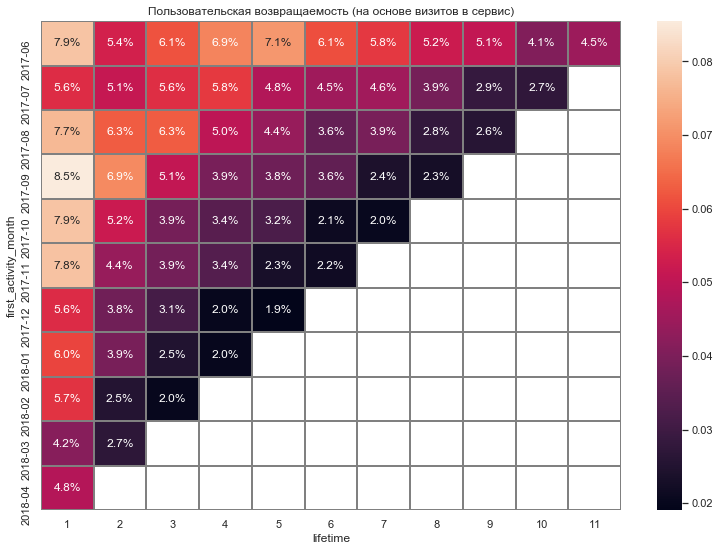

In [56]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Пользовательская возвращаемость (на основе визитов в сервис)')
sns.heatmap(pivot_visits_retention, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

* Не знаю нормальна ли возвращаемость в 1ый lifetime для сервисов данного типа. Может быть значение в 7%-8% не то, что должно быть. Этот вопрос стоит задать какому-то эксперту в области
* В целом с 6 по 11 месяц на 1 lifetime возвращаемость составляла около 8%, а для более поздних когорт заметно снижение до 4-5%. Поведение пользователей молодых когорт меняется в худшую сторону - возвращаемость в сервис падает
* Также начиная с 3 lifetime возвращаемость пользователей по месяцам снижается для всех более молодых когорт
* Лучшим образом ведет себя когорта пользователей Июня 2017 - самая старшая из анализируемых. Её возвращаемость на 11 lifetime более чем в 1,5 раза выше, чем когорты 2018-03 на 2ой lifetime

Если исключить самую старшую когорту и построить возвращаемость со 2ого lifetime:

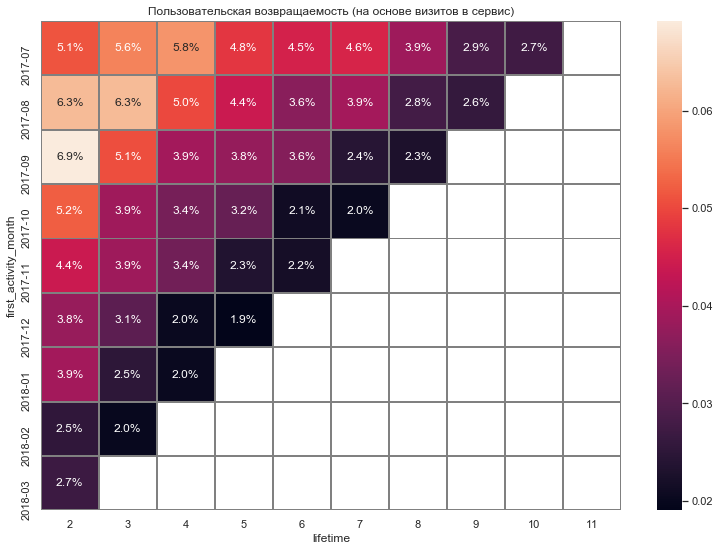

In [57]:
pivot_visits_retention = visits_retention.query('lifetime > 1').pivot_table(
    index='first_activity_month',
    columns='lifetime',
    values='retention',
    aggfunc='sum'
)

pivot_visits_retention.index = pivot_visits_retention.index.strftime('%Y-%m')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Пользовательская возвращаемость (на основе визитов в сервис)')
sns.heatmap(pivot_visits_retention[1:], annot=True, fmt='.1%', linewidths=1, linecolor='gray');

то анализировать карту становится проще: левый верхний угол - светлый, бордовая середина и тёмный край (по диагоналям). 

Заключительный вывод: поведение пользователей со временем меняется в худшую сторону - пользователи из молодых когорт всё реже возвращаются в сервис

Может быть дело в источниках трафика - трафик стал менее качественный, может быть дело в тех изменениях, которая делает продуктовая команда - новые изменения не подходят/не нравятся пользователям, а может - в глобальных изменениях вкусов и трендов на рынке

### Продажи <a id="sales"></a>

В разрезе продаж исследуем:

* Когда люди начинают покупать?
* Сколько раз покупают за период?
* Какой средний чек?
* Сколько денег приносят? (LTV)

Для ответа на 1ый вопрос понадобится объединять таблицы <code>visits</code> и <code>orders</code>, поэтому на него ответим в конце шага

**Выручка** <a id="sales_q1"></a>

В целом при анализе продаж важно понимать что происходит с выручкой: растет она, падает или не изменяется. Выделим день, неделю и месяц заказа в таблице <code>orders</code>

In [58]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['order_week'] = orders['buy_ts'].astype('datetime64[W]')
orders['order_day'] = orders['buy_ts'].astype('datetime64[D]')

orders.head()

,buy_ts,revenue,uid,order_month,order_week,order_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


И построим движение выручки по неделям

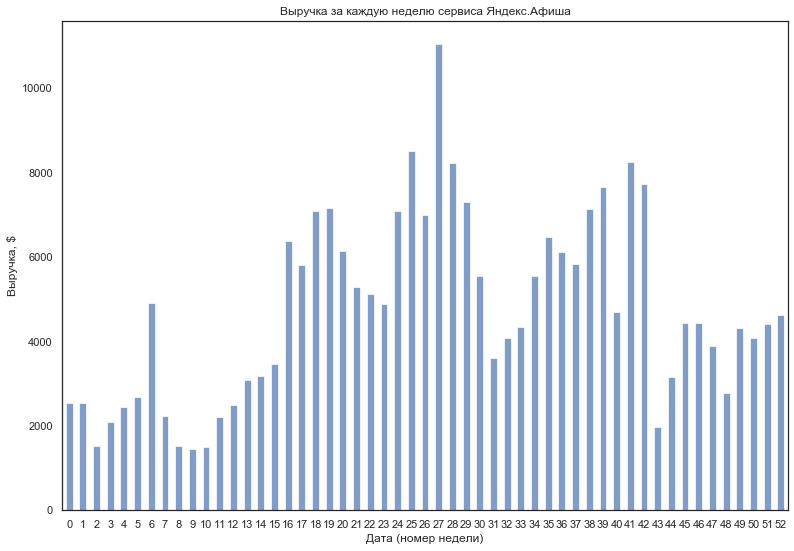

In [59]:
bar_data_plot(
    orders.groupby(['order_week'])['revenue'].sum(),
    'Выручка за каждую неделю сервиса Яндекс.Афиша',
    'Дата (номер недели)',
    'Выручка, $'
)

И по месяцам

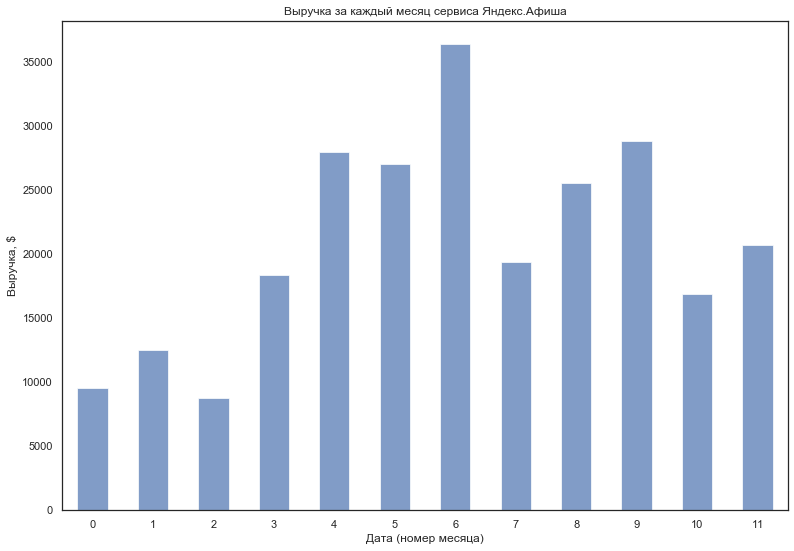

In [60]:
bar_data_plot(
    orders.groupby(['order_month'])['revenue'].sum(),
    'Выручка за каждый месяц сервиса Яндекс.Афиша',
    'Дата (номер месяца)',
    'Выручка, $'
)

plt.xlim(-0.5, 11.5);

В графике помесячной выручки также прослеживается период высокой активности с октября 2017 по март 2018. В январе заметен провал. При этом число уникальных пользователей и визитов подобных провалов в этот период не испытывали. Кажется, что пользователям интересно отслеживать события в январе, но покупать дорогие билеты и куда-то идти - не для них

Однозначно определить что происходит с выручкой сложно: выручка меняется от месяца к месяцу. Не хочется говорить, что существует тренд к росту - ведь 12, 13 и 14 lifetime - лето, где выручка может стать соразмерной 0, 1 и 2 lifetime соответственно

**Сколько раз покупают за период?** <a id="sales_q2"></a>

Определим общее кол-во покупок

In [61]:
print('Общее кол-во покупок за анализируемый период:', orders.shape[0])

Общее кол-во покупок за анализируемый период: 50415


Сгруппируем данные по неделям и визуализируем эту группу

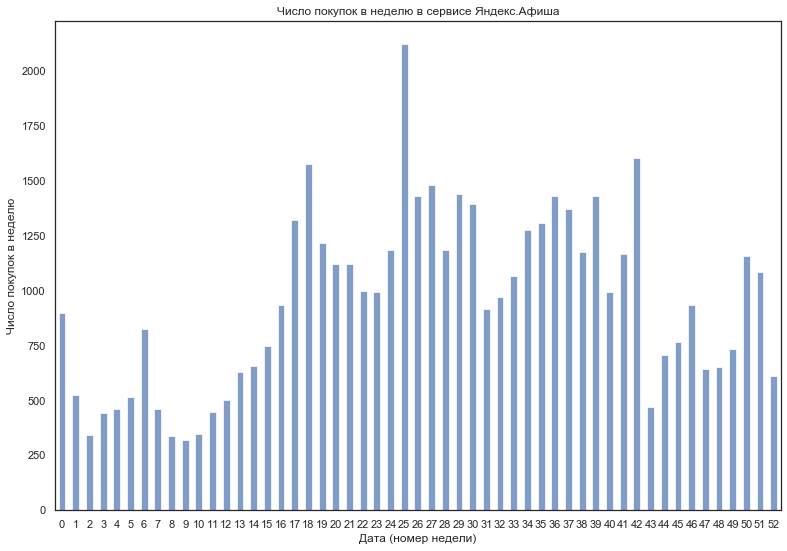

In [62]:
bar_data_plot(
    orders.groupby(['order_week'])['uid'].agg('count'),
    'Число покупок в неделю в сервисе Яндекс.Афиша',
    'Дата (номер недели)',
    'Число покупок в неделю'
)

И по месяцам

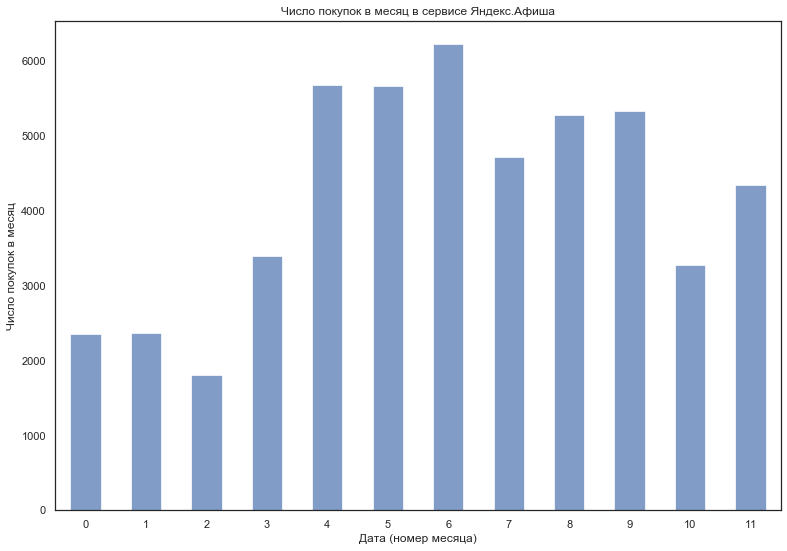

In [63]:
bar_data_plot(
    orders.groupby(['order_month'])['uid'].agg('count'),
    'Число покупок в месяц в сервисе Яндекс.Афиша',
    'Дата (номер месяца)',
    'Число покупок в месяц'
)

plt.xlim(-0.5, 11.5);

Месячный график числа покупок коррелирует с выручкой :)

Если же интереует конкретное число в определенный день или интервал дат:

In [64]:
# впишите интересующий диапазон дат в start_order_day и finish_order_day
start_order_day = datetime.datetime(year=2017, month=9, day=7)
finish_order_day = datetime.datetime(year=2017, month=9, day=13)

if (
        orders['order_day'].min() <= start_order_day <= orders['order_day'].max()
        and orders['order_day'].min() <= finish_order_day <= orders['order_day'].max()
        and start_order_day <= finish_order_day
    ):
    print(
        orders.query('@start_order_day <= order_day <= @finish_order_day')['uid'].count(),
        'заказов было совершено с',
        start_visit_day.strftime('%Y-%m-%d'),
        'по',
        finish_visit_day.strftime('%Y-%m-%d')
    )
else:
    print('Проверьте введенные даты')

656 заказов было совершено с 2017-09-07 по 2017-09-13


**Какой средний чек?** <a id="sales_q3"></a>

На средний чек пользователей интересно смотреть в динамике - как он изменяется с течением жизни пользователей в продукте. Построим данную таблицу. Сначала определим дату 1ой покупки каждого пользователя

In [65]:
first_order_date = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_date = first_order_date.rename(columns={'buy_ts':'first_buy_ts'})
orders = orders.merge(first_order_date, on='uid')

orders.head()

,buy_ts,revenue,uid,order_month,order_week,order_day,first_buy_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00


Из даты 1ой покупки выделим месяц 1ой покупки

In [66]:
orders['first_order_month'] = orders['first_buy_ts'].astype('datetime64[M]')

orders.head()

,buy_ts,revenue,uid,order_month,order_week,order_day,first_buy_ts,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01


Сгруппируем данные по первому месяцу покупки и фактическому месяцу покупки и определим число покупок и выручку

In [67]:
avg_check = orders.groupby(['first_order_month', 'order_month']).agg({'uid':'count', 'revenue':'sum'})

avg_check.head()

uid  revenue
first_order_month order_month               
2017-06-01        2017-06-01   2354  9557.49
                  2017-07-01    177   981.82
                  2017-08-01    174   885.34
                  2017-09-01    226  1931.30
                  2017-10-01    292  2068.58

Определим средний чек: отношение выручки к числу покупок

In [68]:
avg_check['avg_check'] = avg_check['revenue'] / avg_check['uid']
avg_check = avg_check.reset_index()

avg_check.head()

,first_order_month,order_month,uid,revenue,avg_check
0,2017-06-01,2017-06-01,2354,9557.49,4.060106
1,2017-06-01,2017-07-01,177,981.82,5.547006
2,2017-06-01,2017-08-01,174,885.34,5.088161
3,2017-06-01,2017-09-01,226,1931.30,8.545575
4,2017-06-01,2017-10-01,292,2068.58,7.084178


Определим lifetime совершения покупки

In [69]:
avg_check['lifetime'] = (
    ((avg_check['order_month'] - avg_check['first_order_month']) / np.timedelta64(1, 'M'))
    .round()
    .astype('int')
)

avg_check.head()

,first_order_month,order_month,uid,revenue,avg_check,lifetime
0,2017-06-01,2017-06-01,2354,9557.49,4.060106,0
1,2017-06-01,2017-07-01,177,981.82,5.547006,1
2,2017-06-01,2017-08-01,174,885.34,5.088161,2
3,2017-06-01,2017-09-01,226,1931.30,8.545575,3
4,2017-06-01,2017-10-01,292,2068.58,7.084178,4


Преобразуем дату 1ого заказа к строковому типу с заданным форматом

In [70]:
avg_check['first_order_month'] = avg_check['first_order_month'].dt.strftime('%Y-%m')

avg_check.head()

,first_order_month,order_month,uid,revenue,avg_check,lifetime
0,2017-06,2017-06-01,2354,9557.49,4.060106,0
1,2017-06,2017-07-01,177,981.82,5.547006,1
2,2017-06,2017-08-01,174,885.34,5.088161,2
3,2017-06,2017-09-01,226,1931.30,8.545575,3
4,2017-06,2017-10-01,292,2068.58,7.084178,4


Получим искому таблицу

In [71]:
pivot_avg_check = avg_check.pivot_table(
    index='first_order_month',
    values='avg_check',
    columns='lifetime',
    aggfunc='sum'
)

pivot_avg_check.fillna(' ')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.060106,5.54701,5.08816,8.54558,7.08418,6.82532,6.96645,6.76184,5.27901,8.00987,12.0381,6.04209
2017-07,5.287123,6.4461,9.99208,6.6376,4.72181,3.65951,3.78951,5.4544,5.34569,11.79,5.6483,
2017-08,4.715479,5.98731,6.2812,6.6179,7.96294,6.26532,5.89,7.11359,8.70283,5.59848,,
2017-09,4.967109,13.1712,8.35106,62.5702,15.4304,15.3218,16.7671,11.2066,7.78557,,,
2017-10,4.374738,7.40513,5.12747,5.59025,5.09899,5.07155,4.28023,4.00912,,,,
2017-11,4.370717,4.10395,4.47467,6.28498,4.44147,3.72678,4.59824,,,,,
2017-12,4.110746,4.22674,20.0728,26.0844,15.9485,14.111,,,,,,
2018-01,3.687417,4.43848,6.45497,7.52484,2.71128,,,,,,,
2018-02,3.706266,4.57649,3.45373,3.86714,,,,,,,,


В датафрейм попала когорта 2018-06. Построим heatmap, исключив эту когорту из анализа

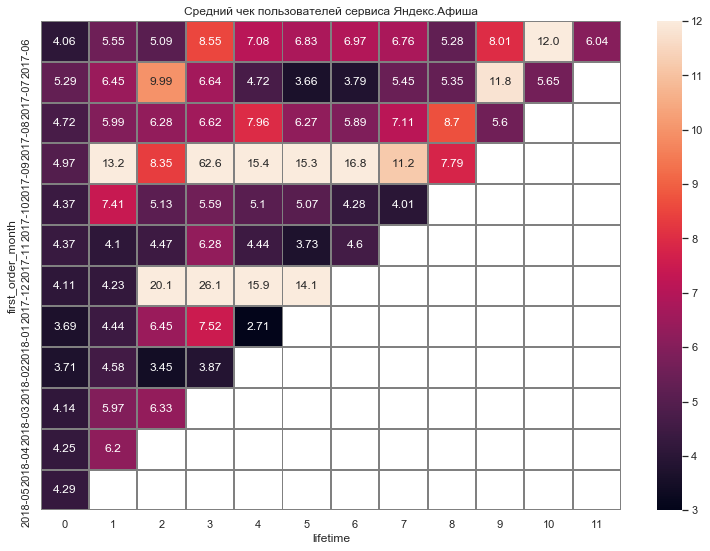

In [72]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Средний чек пользователей сервиса Яндекс.Афиша')
sns.heatmap(pivot_avg_check.query('first_order_month != "2018-06"'), annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin=3, vmax=12);

Интересное значение среднего чека в 62,6$ наблюдается в когорте 2017-09 на 3 lifetime. Посмотрим на данную строку в датафрейме

In [73]:
avg_check.query('first_order_month == "2017-09" and lifetime == 3')

,first_order_month,order_month,uid,revenue,avg_check,lifetime
36,2017-09,2017-12-01,164,10261.52,62.570244,3


* Для всех когорт характерен низкий уровень среднего чека в 0 месяц жизни
* 2 когорты выделяются на фоне остальных - 9 и 12 месяцев 2017 года - их средние чеки заметно выше остальных
* Если исключить эти когорты карта поделится на 2 группы: те, кто старше 9 месяца 2017 и у кого выше средний чек и те, кто младше с более низким показателем среднего чека. Характеристика опять не в пользу более молодых когорт

**Сколько денег приносят? (LTV)** <a id="sales_q4"></a>

Так как расчет LTV сопряжен с расчетом CAC, ROMI и в дальнейшем необходимо смотреть на эти показатели в разрезе источников, то необходимо сразу составлять комплексную таблицу для расчета этих показателей в разных разрезах. Начнем с того, что для каждого заказа определим источник его привленчения, находящийся в таблице <code>visits</code>

Тут необходимо утночнить у маркетологов какую **модель атрибуции** в своей работе они применяют. Будем считать 1ый визит источником заказа. Тогда условие start_ts == first_visit_date отберет все 1-ые визиты в сервисе, а по uid данный срез можно объединить с таблицей <code>orders</code>

In [74]:
orders = orders.merge(visits.query('start_ts == first_visit_date')[['uid', 'source_id']], on='uid')

orders.head()

,buy_ts,revenue,uid,order_month,order_week,order_day,first_buy_ts,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,3


Создадим когорты, группируя по source_id, first_order_month и order_month

In [75]:
cohorts_orders_with_sources = (
    orders
    .groupby(['source_id', 'first_order_month', 'order_month'])
    .agg({'uid':'nunique', 'revenue':'sum'})
    .reset_index()
)

cohorts_orders_with_sources.head()

,source_id,first_order_month,order_month,uid,revenue
0,1,2017-06-01,2017-06-01,190,1378.70
1,1,2017-06-01,2017-07-01,16,414.98
2,1,2017-06-01,2017-08-01,10,419.43
3,1,2017-06-01,2017-09-01,9,714.24
4,1,2017-06-01,2017-10-01,12,811.20


Теперь для каждого источника есть полноценный набор когорт с кол-вом уникальных пользователей в когоре и выручкой. Определим lifetime для каждой когорты

In [76]:
cohorts_orders_with_sources['lifetime'] = (
    ((cohorts_orders_with_sources['order_month'] - cohorts_orders_with_sources['first_order_month']) / np.timedelta64(1, 'M'))
    .round()
    .astype('int')
)

cohorts_orders_with_sources.head()

,source_id,first_order_month,order_month,uid,revenue,lifetime
0,1,2017-06-01,2017-06-01,190,1378.70,0
1,1,2017-06-01,2017-07-01,16,414.98,1
2,1,2017-06-01,2017-08-01,10,419.43,2
3,1,2017-06-01,2017-09-01,9,714.24,3
4,1,2017-06-01,2017-10-01,12,811.20,4


Определим число покупателей изначально существовавших в когорте, т.е. на lifetime = 0

In [77]:
cohorts_orders_ws_sizes = cohorts_orders_with_sources.query('lifetime == 0')[['first_order_month', 'source_id', 'uid']]
cohorts_orders_ws_sizes = cohorts_orders_ws_sizes.rename(columns=({'uid':'n_buyers'}))

cohorts_orders_ws_sizes.head()

,first_order_month,source_id,n_buyers
0,2017-06-01,1,190
12,2017-07-01,1,160
23,2017-08-01,1,113
33,2017-09-01,1,227
42,2017-10-01,1,340


Объединим таблицы по first_order_month и source_id

In [78]:
cohorts_orders_with_sources = cohorts_orders_with_sources.merge(cohorts_orders_ws_sizes, on=['first_order_month', 'source_id'])

cohorts_orders_with_sources.head()

,source_id,first_order_month,order_month,uid,revenue,lifetime,n_buyers
0,1,2017-06-01,2017-06-01,190,1378.70,0,190
1,1,2017-06-01,2017-07-01,16,414.98,1,190
2,1,2017-06-01,2017-08-01,10,419.43,2,190
3,1,2017-06-01,2017-09-01,9,714.24,3,190
4,1,2017-06-01,2017-10-01,12,811.20,4,190


LTV считают не из выручки, а из валовой прибыли. Валовую прибыль можно найти, умножив выручку на маржинальность. Для этого у команды Афиши надо уточнить маржинальность. В работе примем этот показатель равным 50%

In [79]:
margin_rate = .5
cohorts_orders_with_sources['gp'] = cohorts_orders_with_sources['revenue'] * margin_rate

cohorts_orders_with_sources.head()

,source_id,first_order_month,order_month,uid,revenue,lifetime,n_buyers,gp
0,1,2017-06-01,2017-06-01,190,1378.70,0,190,689.350
1,1,2017-06-01,2017-07-01,16,414.98,1,190,207.490
2,1,2017-06-01,2017-08-01,10,419.43,2,190,209.715
3,1,2017-06-01,2017-09-01,9,714.24,3,190,357.120
4,1,2017-06-01,2017-10-01,12,811.20,4,190,405.600


Рассчитаем LTV как отношение валовой прибыли к общему числу покупателей в когорте

In [80]:
cohorts_orders_with_sources['ltv'] = cohorts_orders_with_sources['gp'] / cohorts_orders_with_sources['n_buyers']

cohorts_orders_with_sources.head()

,source_id,first_order_month,order_month,uid,revenue,lifetime,n_buyers,gp,ltv
0,1,2017-06-01,2017-06-01,190,1378.70,0,190,689.350,3.628158
1,1,2017-06-01,2017-07-01,16,414.98,1,190,207.490,1.092053
2,1,2017-06-01,2017-08-01,10,419.43,2,190,209.715,1.103763
3,1,2017-06-01,2017-09-01,9,714.24,3,190,357.120,1.879579
4,1,2017-06-01,2017-10-01,12,811.20,4,190,405.600,2.134737


Теперь необходимо добавить данные о расходах в отчёт, чтобы посчитать CAC и ROMI. Взглянем на таблицу <code>costs</code>

In [81]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Из даты определим месяц расходов

In [82]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

costs.head()

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


Сгруппируем данные о расходах по источнику и месяцу и переименуем столбец cost_month в first_order_month для простоты объединения таблиц

In [83]:
monthly_costs_with_sources = costs.groupby(['cost_month', 'source_id'])['costs'].sum().reset_index()
monthly_costs_with_sources = monthly_costs_with_sources.rename(columns={'cost_month':'first_order_month'})

monthly_costs_with_sources.head()

,first_order_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


Объединим таблицы заказов и расходов

In [84]:
cohorts_orders_with_sources = (
    cohorts_orders_with_sources
    .merge(monthly_costs_with_sources, on=['first_order_month', 'source_id'])
)

cohorts_orders_with_sources.head()

,source_id,first_order_month,order_month,uid,revenue,lifetime,n_buyers,gp,ltv,costs
0,1,2017-06-01,2017-06-01,190,1378.70,0,190,689.350,3.628158,1125.61
1,1,2017-06-01,2017-07-01,16,414.98,1,190,207.490,1.092053,1125.61
2,1,2017-06-01,2017-08-01,10,419.43,2,190,209.715,1.103763,1125.61
3,1,2017-06-01,2017-09-01,9,714.24,3,190,357.120,1.879579,1125.61
4,1,2017-06-01,2017-10-01,12,811.20,4,190,405.600,2.134737,1125.61


Рассчитаем стоимость привлечения клиента: разделим расходы на общее число покупателей в когорте

In [85]:
cohorts_orders_with_sources['cac'] = cohorts_orders_with_sources['costs'] / cohorts_orders_with_sources['n_buyers']

cohorts_orders_with_sources.head()

,source_id,first_order_month,order_month,uid,revenue,lifetime,n_buyers,gp,ltv,costs,cac
0,1,2017-06-01,2017-06-01,190,1378.70,0,190,689.350,3.628158,1125.61,5.924263
1,1,2017-06-01,2017-07-01,16,414.98,1,190,207.490,1.092053,1125.61,5.924263
2,1,2017-06-01,2017-08-01,10,419.43,2,190,209.715,1.103763,1125.61,5.924263
3,1,2017-06-01,2017-09-01,9,714.24,3,190,357.120,1.879579,1125.61,5.924263
4,1,2017-06-01,2017-10-01,12,811.20,4,190,405.600,2.134737,1125.61,5.924263


Осталось определить ROMI, как отношение LTV к CAC

In [86]:
cohorts_orders_with_sources['romi'] = cohorts_orders_with_sources['ltv'] / cohorts_orders_with_sources['cac']

cohorts_orders_with_sources.head()

,source_id,first_order_month,order_month,uid,revenue,lifetime,n_buyers,gp,ltv,costs,cac,romi
0,1,2017-06-01,2017-06-01,190,1378.70,0,190,689.350,3.628158,1125.61,5.924263,0.612423
1,1,2017-06-01,2017-07-01,16,414.98,1,190,207.490,1.092053,1125.61,5.924263,0.184336
2,1,2017-06-01,2017-08-01,10,419.43,2,190,209.715,1.103763,1125.61,5.924263,0.186312
3,1,2017-06-01,2017-09-01,9,714.24,3,190,357.120,1.879579,1125.61,5.924263,0.317268
4,1,2017-06-01,2017-10-01,12,811.20,4,190,405.600,2.134737,1125.61,5.924263,0.360338


Отилично, теперь есть таблица, которая позволит взглянуть на LTV, CAC и ROMI в разрезах по источникам. К сожалению таблица не подойдет для определения общих показателей этих метрик (без разделения по источникам), поэтому таблицу для них придется построить отдельно.

Выделим подходящую часть таблицы из <code>cohorts_orders_with_sources</code>

In [87]:
cohorts = (
    cohorts_orders_with_sources
    .groupby(['first_order_month', 'order_month'])
    .agg({'uid':'sum', 'revenue':'sum', 'lifetime':'first', 'gp':'sum'})
    .reset_index()
)

cohorts.head()

,first_order_month,order_month,uid,revenue,lifetime,gp
0,2017-06-01,2017-06-01,2023,9557.49,0,4778.745
1,2017-06-01,2017-07-01,61,981.82,1,490.910
2,2017-06-01,2017-08-01,50,885.34,2,442.670
3,2017-06-01,2017-09-01,54,1931.30,3,965.650
4,2017-06-01,2017-10-01,88,2068.58,4,1034.290


Добавим общее число покупателей в когорте

In [88]:
cohorts = (
    cohorts
    .merge(cohorts.query('lifetime == 0')[['first_order_month', 'uid']]
           .rename(columns={'uid':'n_buyers'}), on='first_order_month')
)

cohorts.head()

,first_order_month,order_month,uid,revenue,lifetime,gp,n_buyers
0,2017-06-01,2017-06-01,2023,9557.49,0,4778.745,2023
1,2017-06-01,2017-07-01,61,981.82,1,490.910,2023
2,2017-06-01,2017-08-01,50,885.34,2,442.670,2023
3,2017-06-01,2017-09-01,54,1931.30,3,965.650,2023
4,2017-06-01,2017-10-01,88,2068.58,4,1034.290,2023


Вычислим LTV

In [89]:
cohorts['ltv'] = cohorts['gp'] / cohorts['n_buyers']

cohorts.head()

,first_order_month,order_month,uid,revenue,lifetime,gp,n_buyers,ltv
0,2017-06-01,2017-06-01,2023,9557.49,0,4778.745,2023,2.362207
1,2017-06-01,2017-07-01,61,981.82,1,490.910,2023,0.242664
2,2017-06-01,2017-08-01,50,885.34,2,442.670,2023,0.218819
3,2017-06-01,2017-09-01,54,1931.30,3,965.650,2023,0.477336
4,2017-06-01,2017-10-01,88,2068.58,4,1034.290,2023,0.511265


Добавим расходы

In [90]:
cohorts = (
    cohorts
    .merge(costs.groupby(['cost_month'])['costs'].sum().reset_index(), left_on='first_order_month', right_on='cost_month')
)

cohorts.head()

,first_order_month,order_month,uid,revenue,lifetime,gp,n_buyers,ltv,cost_month,costs
0,2017-06-01,2017-06-01,2023,9557.49,0,4778.745,2023,2.362207,2017-06-01,18015.0
1,2017-06-01,2017-07-01,61,981.82,1,490.910,2023,0.242664,2017-06-01,18015.0
2,2017-06-01,2017-08-01,50,885.34,2,442.670,2023,0.218819,2017-06-01,18015.0
3,2017-06-01,2017-09-01,54,1931.30,3,965.650,2023,0.477336,2017-06-01,18015.0
4,2017-06-01,2017-10-01,88,2068.58,4,1034.290,2023,0.511265,2017-06-01,18015.0


Наконец рассчитаем CAC и ROMI

In [91]:
cohorts['cac'] = cohorts['costs'] / cohorts['n_buyers']
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']

cohorts.head()

,first_order_month,order_month,uid,revenue,lifetime,gp,n_buyers,ltv,cost_month,costs,cac,romi
0,2017-06-01,2017-06-01,2023,9557.49,0,4778.745,2023,2.362207,2017-06-01,18015.0,8.905091,0.265265
1,2017-06-01,2017-07-01,61,981.82,1,490.910,2023,0.242664,2017-06-01,18015.0,8.905091,0.027250
2,2017-06-01,2017-08-01,50,885.34,2,442.670,2023,0.218819,2017-06-01,18015.0,8.905091,0.024572
3,2017-06-01,2017-09-01,54,1931.30,3,965.650,2023,0.477336,2017-06-01,18015.0,8.905091,0.053603
4,2017-06-01,2017-10-01,88,2068.58,4,1034.290,2023,0.511265,2017-06-01,18015.0,8.905091,0.057413


Подведем небольшой промежуточный итог: в нашем распоряжении имеются таблицы <code>cohorts</code> и <code>cohorts_orders_with_sources</code> - 1ая с общими показателями, 2ая с разбивкой по источникам.

Создадим функцию, которая на вход будет принимать датафрейм, а на выходе возвращать сводную таблицу с группировкой по интересующему показателю: LTV, CAC или ROMI, а также будет применять переданный метод к датафрейму по строке или столбцу и возвращать результат в зависимости от наличия этого параметра

In [92]:
def pivot_cohorts_func (data, column, param=0, axis=1):
    # формируем сводную таблицу
    output = data.pivot_table(
        index='first_order_month', 
        columns='lifetime', 
        values=column,
        aggfunc='sum'
    )
    
    # проверяем наличие параметра
    if param:
        return (output, output.apply(param, axis=axis).reset_index())
    
    return output

Теперь можно в цикле пройтись по всем уникальным источникам и построить таблицы для каждого из них. Начнем с общей таблицы <code>cohorts</code>

In [93]:
pivot_cohorts_func(cohorts, 'ltv').round(3).fillna(' ')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.362,0.243,0.219,0.477,0.511,0.368,0.475,0.291,0.277,0.303,0.286,0.128
2017-07-01,3.005,0.168,0.312,0.179,0.088,0.078,0.06,0.071,0.081,0.074,0.078,
2017-08-01,2.640,0.236,0.229,0.196,0.247,0.142,0.105,0.203,0.146,0.094,,
2017-09-01,2.822,0.559,0.26,1.988,0.2,0.324,0.351,0.122,0.092,,,
2017-10-01,2.502,0.268,0.096,0.079,0.076,0.06,0.042,0.058,,,,
2017-11-01,2.577,0.2,0.1,0.162,0.074,0.027,0.057,,,,,
2017-12-01,2.369,0.13,0.463,0.533,0.156,0.169,,,,,,
2018-01-01,2.068,0.147,0.152,0.071,0.031,,,,,,,
2018-02-01,2.078,0.139,0.039,0.037,,,,,,,,


Взглянем на суммарный LTV самой старшей когорты

In [94]:
pivot_cohorts_func(cohorts.query('first_order_month == "2017-06-01"'), 'ltv', 'sum', 1)[1]

,first_order_month,0
0,2017-06-01,5.939617


В среднем каждый покупатель из самой старшей когорты принес по 5.94$ выручки за 12 месяцев. Также взглянем на лидеров по среднему чеку - когорты 9 и 12 месяцев 2017

In [95]:
pivot_cohorts_func(cohorts.query('first_order_month in ["2017-09-01", "2017-12-01"]'), 'ltv', 'sum', 1)[1]

,first_order_month,0
0,2017-09-01,6.717613
1,2017-12-01,3.819957


За 9 и за 6 месяцев в среднем каждый покупатель принёс 6.72 и 3.81 долларов выручки соответственно. Рассчитаем среднюю когорту, усреднив LTV за каждый месяц жизни

In [96]:
pivot_cohorts_func(cohorts, 'ltv', 'mean', 0)[1].round(3)

,lifetime,0
0,0,2.459
1,1,0.228
2,2,0.203
3,3,0.414
4,4,0.173
5,5,0.167
6,6,0.182
7,7,0.149
8,8,0.149
9,9,0.157


И рассчитаем сумму средней когорты

In [97]:
pivot_cohorts_func(cohorts, 'ltv', 'mean', 0)[1].round(3)[0].sum()

4.591

В среднем каждый покупатель принес по 4.6$ валовой прибыли за год жизни в сервисе

Сложно делать какие-то выводы на основе только лишь LTV. При расчете ROMI будет ясно окупились ли расходы на вложения в привлечение покупателей или нет.

P.S. LTV для разных источников можно посмотреть с помощью кода ниже

In [98]:
# здесь будут храниться сводные таблицы для каждого источника, где ключ - номер источника
ltv_diс = {}

# в элементе с нулевым ключом можно найти список существующих источников
ltv_diс[0] = cohorts_orders_with_sources['source_id'].unique().tolist()

for source in cohorts_orders_with_sources['source_id'].unique().tolist():
    ltv_diс[source] = pivot_cohorts_func(cohorts_orders_with_sources.query('source_id == @source'), 'ltv')

In [99]:
print('Существующие источники:', ltv_diс[0])

#ltv_diс[4]

Существующие источники: [1, 2, 3, 4, 5, 9, 10]


**Когда начинают покупать?** <a id="sales_q5"></a>

Разница времен между 1ым визитом и 1ой покупкой будет ответом на данный вопрос. Обязательно проверим, чтобы время визита было раньше времени 1ой покупки :)

В нашем распоряжении уже есть 2 необходимые таблицы: <code>first_visits</code> и <code>first_order_date</code>. Объединим их по uid

In [100]:
first_visits = first_visits.reset_index()
duration = first_order_date.merge(first_visits, on='uid')

duration.head()

,uid,first_buy_ts,first_visit_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Проверим условие first_visit_date > first_buy_ts

In [101]:
duration.query('first_visit_date > first_buy_ts')['uid'].count()

0

Определим время покупки, как разницу между покупкой и визитом

In [102]:
duration['duration'] = (
    ((duration['first_buy_ts'] - duration['first_visit_date']) / np.timedelta64(1, 'm'))
    .round()
    .astype('int')
)

duration.head()

,uid,first_buy_ts,first_visit_date,duration
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


Изучим duration - построим boxplot и рассчитаем числовое описание данных столбца

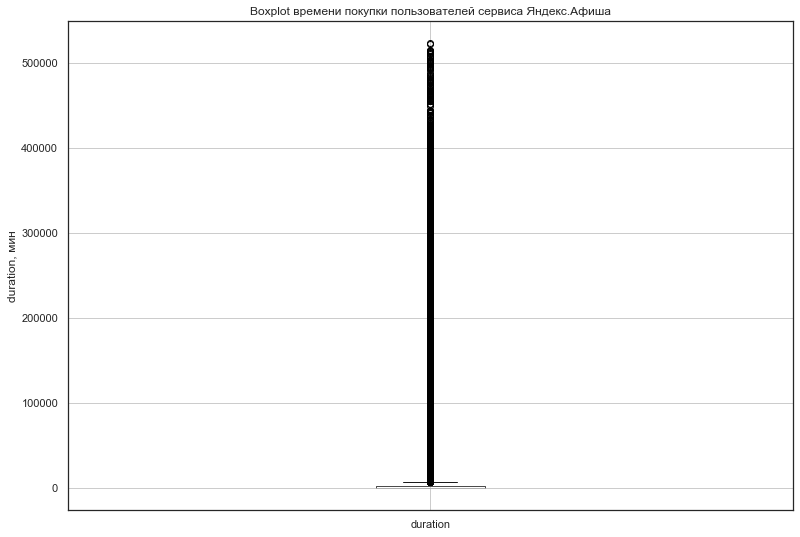

In [103]:
duration.boxplot(
    column='duration',
    figsize=(13, 9)
)

plt.title('Boxplot времени покупки пользователей сервиса Яндекс.Афиша')
plt.ylabel('duration, мин')
plt.show()

In [104]:
duration['duration'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: duration, dtype: float64

Не забываем - duration равный 0 означает покупку в 1ую сессию с временем покупки до 1ой минуты.

Явно прослеживается какая-то кластеризация по времени покупки - есть те, кто покупают практически сразу, а есть те, кто покупают долго. Сузим диапазон до 50 минут и построим гистограмму

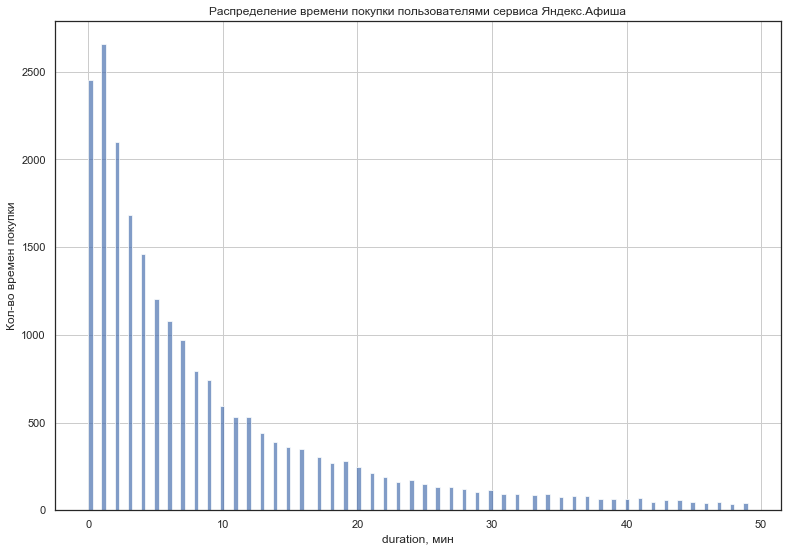

In [105]:
dur = 50
duration.query('duration < @dur')['duration'].hist(bins=150, figsize=(13, 9), alpha=.7)

plt.title('Распределение времени покупки пользователями сервиса Яндекс.Афиша')
plt.xlabel('duration, мин')
plt.ylabel('Кол-во времен покупки')
plt.show()

Картина очень схожа с длительностью сессии, но в этот раз кластеризация будет выполнена немного иначе. В сутках 1440 минут. Найдем соразмерные срезы

In [106]:
duration.query('duration < 5')['duration'].shape[0]

10354

In [107]:
duration.query('5 <= duration < 120')['duration'].shape[0]

13279

In [108]:
duration.query('120 <= duration')['duration'].shape[0]

12890

Отдельно взглянем на числовое описание данных 2ой группы

In [109]:
duration.query('5 <= duration < 120')['duration'].describe()

count    13279.000000
mean        21.711349
std         22.268360
min          5.000000
25%          8.000000
50%         13.000000
75%         25.000000
max        119.000000
Name: duration, dtype: float64

Отлично, кластеризация будет следующей:

1. Есть те, кто покупают быстро с временем покупки 1 минута (мода для быстрой группы)
2. Есть те, кто принимают решение о покупке в 1ые пару часов. При этом среднее время их принятия решения от 13 до 22 минут
3. Есть те, кто кому на принятие решения о покупке нужны более чем 2 часа. При этом это могут быть и пару дней/недель или месяцев

Кластеризация грубая, но для первичного ознакомления с данными кажется достаточной :)

### Маркетинг <a id="marketing"></a>

В разрезе маркетинга исследуем

* Сколько денег потратили? Всего / на каждый источник / по времени
* Сколько стоило привлечение одного покупателя из каждого источника?
* На сколько окупились расходы? (ROI)

**Сколько денег потратили? Всего / на каждый источник / по времени** <a id="marketing_q1"></a>

Определим сколько денег потратили всего

In [110]:
costs['costs'].sum().round()

329132.0

При этом на каждый источник было потрачено

In [111]:
costs.groupby('source_id')['costs'].sum().reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Визуализируем суммарные расходы на каждый источник

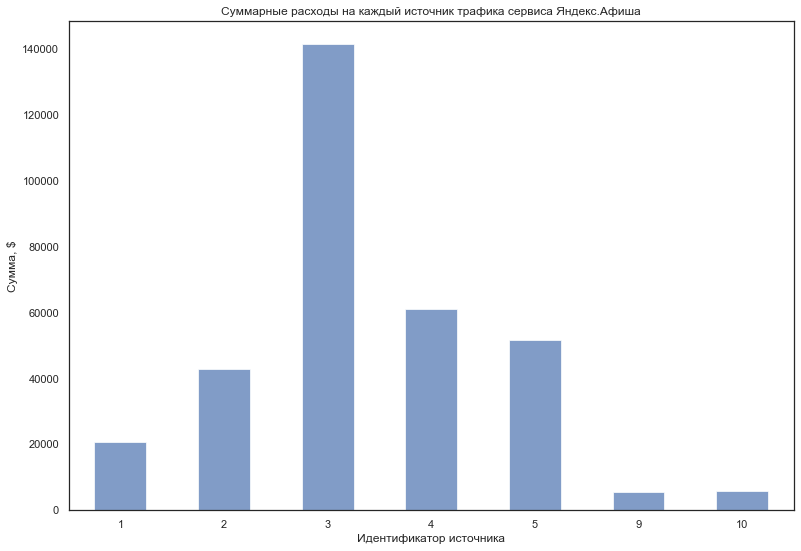

In [112]:
costs.groupby('source_id')['costs'].sum().plot(
    kind='bar',
    figsize=(13, 9),
    alpha=.7
)
    
plt.title('Суммарные расходы на каждый источник трафика сервиса Яндекс.Афиша')
plt.xlabel('Идентификатор источника')
plt.ylabel('Сумма, $')
plt.xticks(rotation=360)
plt.show()

Сгруппируем расходы за каждый месяц с разрезом по источнику и визуализируем полученную таблицу

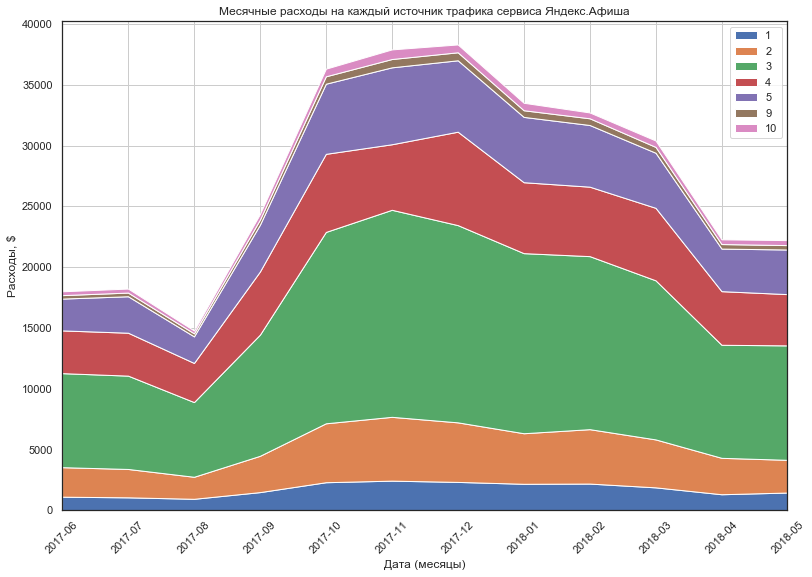

In [113]:
pivot_costs = costs.pivot_table(
    index='cost_month',
    values='costs',
    columns='source_id',
    aggfunc='sum'
).reset_index()

pivot_costs['cost_month'] = pivot_costs['cost_month'].dt.strftime('%Y-%m')
plt.figure(figsize=(13, 9))

plt.title('Месячные расходы на каждый источник трафика сервиса Яндекс.Афиша')
plt.xlabel('Дата (месяцы)')
plt.xticks(rotation=45)
plt.xlim(0, 11)
plt.ylabel('Расходы, $')

plt.stackplot(
    pivot_costs[pivot_costs.columns[0]],
    pivot_costs[pivot_costs.columns[1:]].transpose().values,
    labels=pivot_costs.columns[1:]
)

plt.legend()
plt.grid(True)

* В период активности рекламные бюджеты выросли, в особенности у источника 3
* Наибольшая сумма затрат соответствует 3-ему источнику. Он опережает своего ближайшего конкурента практически в 2.5 раза 
* 4 и 5 источники соизмеримы по объему затрат
* Меньше всего средств было затрачено на источники 9 и 10

В разрезе разных источников интересно узнать конверсию в 1ую покупку для каждого из них. Из таблицы visits выделим месяц и источник только 1ых визитов по условию start_ts == first_visit_date

In [114]:
visit_source = (
    visits
    .query('start_ts == first_visit_date')
    .groupby(['start_month', 'source_id'])
    .agg({'uid':'nunique'})
    .reset_index()
    .rename(columns={'start_month':'month', 'uid':'visits'})
)

visit_source.head()

,month,source_id,visits
0,2017-06-01,1,631
1,2017-06-01,2,1262
2,2017-06-01,3,4080
3,2017-06-01,4,3447
4,2017-06-01,5,2728


Аналогично сгруппируем таблицу <code>orders</code> по order_month и source_id, рассчитав кол-во 1ых заказов

In [115]:
orders_source = (
    orders
    .query('buy_ts == first_buy_ts')
    .groupby(['order_month', 'source_id'])
    .agg({'uid':'nunique'})
    .reset_index()
    .rename(columns={'order_month':'month', 'uid':'orders'})
)

orders_source.head()

,month,source_id,orders
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


Сгруппируем таблицы по <code>month</code> и <code>source_id</code>

In [116]:
result = visit_source.merge(orders_source, on=['month', 'source_id'])

result.head()

,month,source_id,visits,orders
0,2017-06-01,1,631,190
1,2017-06-01,2,1262,235
2,2017-06-01,3,4080,638
3,2017-06-01,4,3447,413
4,2017-06-01,5,2728,384


Отлично, найдем ctr как отношение orders к visits

In [117]:
result['ctr'] = (result['orders'] / result['visits']) * 100

result.head()

,month,source_id,visits,orders,ctr
0,2017-06-01,1,631,190,30.110935
1,2017-06-01,2,1262,235,18.621236
2,2017-06-01,3,4080,638,15.637255
3,2017-06-01,4,3447,413,11.981433
4,2017-06-01,5,2728,384,14.076246


Визуализируем в виде сводной таблицы

In [118]:
ctr_pivot = result.pivot_table(
    index='month',
    values='ctr',
    columns='source_id',
    aggfunc='sum'
)

ctr_pivot.round(1)

source_id,1,2,3,4,5,7,9,10
month,,,,,,,,
2017-06-01,30.1,18.6,15.6,12.0,14.1,NaN,9.5,24.0
2017-07-01,29.6,17.2,13.9,14.2,12.7,NaN,11.7,18.6
2017-08-01,30.8,17.0,11.3,12.8,12.7,100.0,14.7,17.5
2017-09-01,33.1,18.0,15.4,13.2,13.6,NaN,16.9,19.5
2017-10-01,32.9,20.5,15.8,15.0,14.5,NaN,20.7,25.5
2017-11-01,29.0,18.2,14.5,13.5,13.0,NaN,17.6,18.2
2017-12-01,31.2,21.3,17.7,15.3,15.8,NaN,19.7,17.5
2018-01-01,28.7,19.5,14.9,13.4,13.8,NaN,16.7,12.3
2018-02-01,31.1,19.5,16.0,15.5,14.9,NaN,18.5,14.6


Средние значения для каждого источника

In [119]:
ctr_pivot.mean().reset_index().rename(columns={0:'ctr_mean'})

,source_id,ctr_mean
0,1,30.556812
1,2,19.666261
2,3,15.764527
3,4,14.008009
4,5,14.053867
5,7,100.000000
6,9,16.723418
7,10,19.442977


Отдельно взглянем на источник под номером 7 с CTR1 = 100%

In [120]:
result.query('source_id == 7')

,month,source_id,visits,orders,ctr
19,2017-08-01,7,1,1,100.0


In [121]:
visit_source.query('source_id == 7')

,month,source_id,visits
5,2017-06-01,7,2
14,2017-07-01,7,2
22,2017-08-01,7,1
30,2017-09-01,7,2
38,2017-10-01,7,5
47,2017-11-01,7,1
55,2017-12-01,7,9
63,2018-01-01,7,4
71,2018-02-01,7,2
79,2018-03-01,7,1


In [122]:
orders_source.query('source_id == 7')

,month,source_id,orders
19,2017-08-01,7,1


Если с помощью конверсии в 1ую покупку можно судить о "качестве" трафика, то 1ый канал, безусловно, самый качественный. За ним идут 2 и 10, а на 3ем месте - 9. Из наибольших по объему привлечения трафика лидирует 3 источник

**Сколько стоило привлечение одного покупателя из каждого источника?** <a id="marketing_q2"></a>

Сгруппируем данные о заказах и расходах на каждый источник

In [123]:
orders_source = (
    orders
    .groupby(['first_order_month', 'source_id'])
    .agg({'uid':'nunique'})
    .reset_index()
    .rename(columns={'first_order_month':'month', 'uid':'orders'})
)

orders_source.head()

,month,source_id,orders
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


In [124]:
costs_source = costs.groupby(['cost_month', 'source_id'])['costs'].sum().reset_index().rename(columns={'cost_month':'month'})

costs_source.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


Сгруппируем таблицы

In [125]:
orders_source = orders_source.merge(costs_source, on=['month', 'source_id'])
orders_source['costs_per_order'] = orders_source['costs'] / orders_source['orders']

orders_source.head()

,month,source_id,orders,costs,costs_per_order
0,2017-06-01,1,190,1125.61,5.924263
1,2017-06-01,2,235,2427.38,10.329277
2,2017-06-01,3,638,7731.65,12.118574
3,2017-06-01,4,413,3514.80,8.510412
4,2017-06-01,5,384,2616.12,6.812813


Визуализируем данные с помощью датафрейма

In [126]:
pivot_costs_per_order = orders_source.pivot_table(
    index='month',
    values='costs_per_order',
    columns='source_id',
    aggfunc='sum'
)

pivot_costs_per_order

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,5.924263,10.329277,12.118574,8.510412,6.812813,4.194412,3.307579
2017-07-01,6.705500,11.216875,14.989004,6.827331,7.087801,5.818077,6.467059
2017-08-01,8.423097,14.723984,18.230089,9.518817,6.070222,4.080820,6.285676
2017-09-01,6.616784,13.509774,12.757426,8.800441,6.535042,4.777241,5.356628
2017-10-01,6.811029,12.234848,13.660799,5.478532,6.103069,4.836587,3.001148
2017-11-01,7.546790,13.185126,14.001102,4.578437,9.127475,4.711586,6.190313
2017-12-01,7.073112,12.855118,12.315505,5.577683,7.616757,5.437851,7.598353
2018-01-01,9.185630,14.238836,14.720457,5.651928,8.485814,6.839500,6.677717
2018-02-01,8.016291,15.270785,13.029817,5.164521,7.479808,6.565476,3.909593


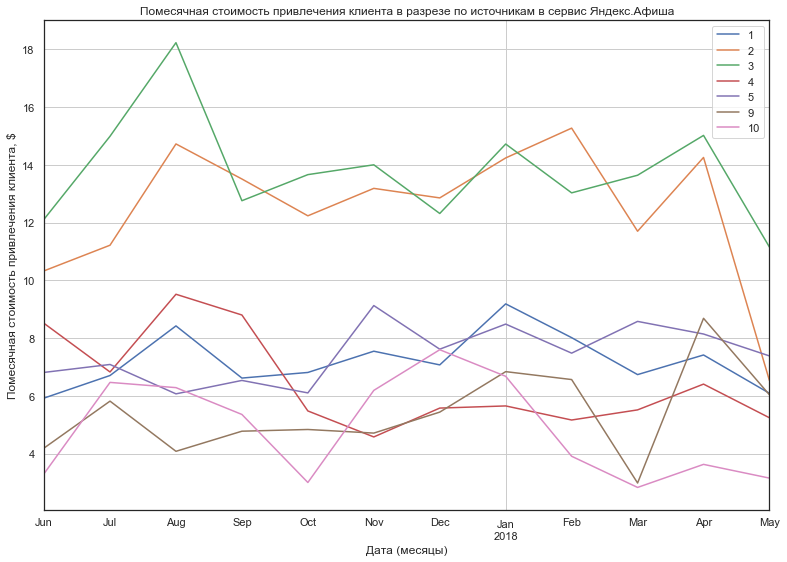

In [127]:
pivot_costs_per_order.plot(kind='line', figsize=(13, 9))

plt.title('Помесячная стоимость привлечения клиента в разрезе по источникам в сервис Яндекс.Афиша')
plt.xlabel('Дата (месяцы)')
plt.ylabel('Помесячная стоимость привлечения клиента, $')

plt.grid(True)
plt.legend()
plt.show()

Найдем среднюю стоимость привлечения одного покупателя из каждого источника

In [128]:
pivot_costs_per_order.mean().round(2).reset_index().rename(columns={0:'costs_per_order_mean'})

,source_id,costs_per_order_mean
0,1,7.21
1,2,12.50
2,3,13.80
3,4,6.44
4,5,7.45
5,9,5.41
6,10,4.87


* Самая низкая стоимость привлечения характерна источникам 9 и 10
* Из наибольших по объему трафика источников 4ый и 5ый источники отличаются низкой стоимостью привлечения одого покупателя относительно 3его.
* Источник 2 в мае 2018 стал существенно дешевле
* Зная средний показатель LTV становится немного грустно - средняя стоимость привлечения пользователей выше, чем средний суммарный LTV за 1 год. Вероятнее всего экономика одного покупателя не сойдется

**На сколько окупились расходы? (ROMI)** <a id="marketing_q3"></a>

Для определения общего ROMI воспользуемся таблицей <code>cohorts</code> и функцией <code>pivot_cohorts_func</code>

In [129]:
cohorts.head()

,first_order_month,order_month,uid,revenue,lifetime,gp,n_buyers,ltv,cost_month,costs,cac,romi
0,2017-06-01,2017-06-01,2023,9557.49,0,4778.745,2023,2.362207,2017-06-01,18015.0,8.905091,0.265265
1,2017-06-01,2017-07-01,61,981.82,1,490.910,2023,0.242664,2017-06-01,18015.0,8.905091,0.027250
2,2017-06-01,2017-08-01,50,885.34,2,442.670,2023,0.218819,2017-06-01,18015.0,8.905091,0.024572
3,2017-06-01,2017-09-01,54,1931.30,3,965.650,2023,0.477336,2017-06-01,18015.0,8.905091,0.053603
4,2017-06-01,2017-10-01,88,2068.58,4,1034.290,2023,0.511265,2017-06-01,18015.0,8.905091,0.057413


In [130]:
pivot_cohorts_func(cohorts, 'romi', 'cumsum')[1].round(3).fillna(' ')

lifetime,first_order_month,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,0.265,0.293,0.317,0.371,0.428,0.469,0.523,0.555,0.586,0.62,0.653,0.667
1,2017-07-01,0.317,0.334,0.367,0.386,0.396,0.404,0.41,0.418,0.426,0.434,0.442,
2,2017-08-01,0.244,0.266,0.287,0.306,0.328,0.342,0.351,0.37,0.384,0.392,,
3,2017-09-01,0.299,0.358,0.386,0.596,0.617,0.652,0.689,0.702,0.711,,,
4,2017-10-01,0.299,0.331,0.342,0.352,0.361,0.368,0.373,0.38,,,,
5,2017-11-01,0.277,0.299,0.31,0.327,0.335,0.338,0.344,,,,,
6,2017-12-01,0.271,0.286,0.339,0.4,0.418,0.437,,,,,,
7,2018-01-01,0.208,0.223,0.238,0.245,0.249,,,,,,,
8,2018-02-01,0.232,0.247,0.252,0.256,,,,,,,,
9,2018-03-01,0.281,0.299,0.317,,,,,,,,,


В соответствии с общим ROMI ни одна когорта не окупила расходов на её привлечение (как и предполагалось пунктом выше). Наиболее близкими к окупаемости являются когорты 6 и 9 месяцев 2017 года. Рассчитаем среднюю когорту - усредним ROMI всех когорт за каждый месяц "жизни"

In [131]:
pivot_cohorts_func(cohorts, 'romi', 'cumsum')[1].mean(axis=0).round(3).reset_index()

,lifetime,0
0,0,0.270
1,1,0.291
2,2,0.316
3,3,0.360
4,4,0.391
5,5,0.430
6,6,0.448
7,7,0.485
8,8,0.527
9,9,0.482


Неутешительный вывод: в среднем когорты не окупаются за год

Исследуем ROMI для каждого источника трафика

In [132]:
# здесь будут храниться сводные таблицы для каждого источника, где ключ - номер источника
romi_dic = {}

# список существующих источников
romi_dic[0] = cohorts_orders_with_sources['source_id'].unique().tolist()

for source in cohorts_orders_with_sources['source_id'].unique().tolist():
    romi_dic[source] = pivot_cohorts_func(cohorts_orders_with_sources.query('source_id == @source'), 'romi', 'cumsum', 1)

In [133]:
# все существующие источники находятся в словаре с нулевым ключом
romi_dic[0]

[1, 2, 3, 4, 5, 9, 10]

Найдем средние когорты для каждого источника трафика

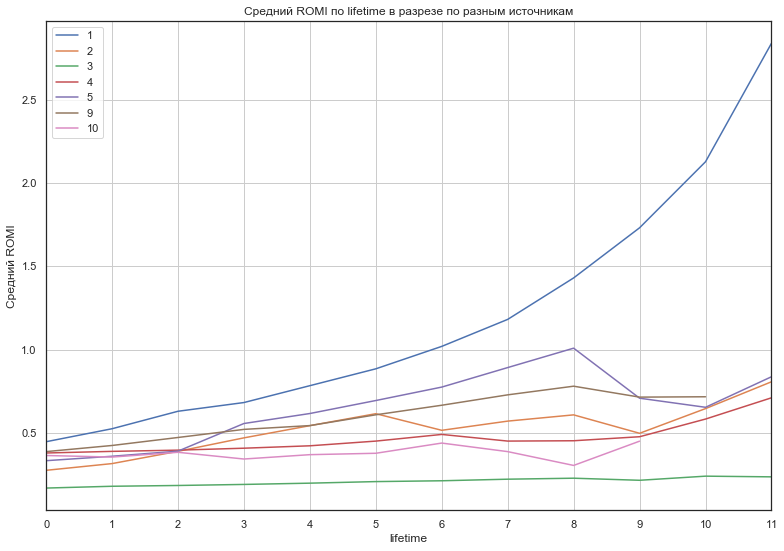

In [134]:
plt.figure(figsize=(13, 9))
        
plt.title('Средний ROMI по lifetime в разрезе по разным источникам')
plt.xlabel('lifetime')
plt.xlim(0, 11)
plt.xticks(np.arange(0, 12, 1))
plt.ylabel('Средний ROMI')

legend = []

for i in romi_dic[0]:
    romi_dic[i][1].mean(axis=0).plot()
    legend.append(i)    

plt.grid(True)
plt.legend(legend)
plt.show()

Отдельно взглянем на ROMI источника 5

In [135]:
"""
for i in romi_dic[0]:
    print('Источник:', i)
    print(romi_dic[i][1].round(3).mean(axis=0))
    print()
"""

romi_dic[5][0].cumsum(axis=1).fillna(' ')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.362921,0.429189,0.462163,0.526214,0.574895,0.596746,0.66319,0.706277,0.747257,0.816654,0.828106,0.836667
2017-07-01,0.372933,0.395474,0.427553,0.438367,0.445208,0.452817,0.454682,0.46247,0.468989,0.472998,0.478275,
2017-08-01,0.415976,0.477936,0.546449,0.604959,0.693893,0.742873,0.774594,0.794875,0.814461,0.833781,,
2017-09-01,0.474096,0.488056,0.513416,1.75043,1.80956,1.96399,1.98543,2.00077,2.00249,,,
2017-10-01,0.417091,0.435364,0.445226,0.455229,0.464516,0.472505,0.484301,0.494599,,,,
2017-11-01,0.249817,0.260074,0.266525,0.269563,0.277071,0.27926,0.285201,,,,,
2017-12-01,0.328680,0.337564,0.343468,0.347064,0.348342,0.348868,,,,,,
2018-01-01,0.256413,0.286955,0.309614,0.311479,0.313105,,,,,,,
2018-02-01,0.288893,0.295063,0.298153,0.298812,,,,,,,,


* Клиенты из 1ого источника окупают расходы на свое привлечение в среднем на 6ой месяц жизни в проекте
* Особенность 5ого источника на 8 lifetime в 1ой сверхокупившейся когорте - она сильно завышает среднее значение
* Клиенты из остальных источников не окупаются. При этом наиболее близкими к окупаемости являются источники 5 и 2. Немного отстают пользователи из источников 9 и 4
* Клиенты из источников 10 и 3 далеки от окупаемости 

Для полноценного вывода не хватает возвращаемости в разрезе источников привлечения. Если когорта по определенному источнику не окупилась, но имеет высокий показатель возвращаемости, то говорить о плохом качестве источника будет опрометчивым решением 

К таблице <code>visits</code> добавим источник 1ого визита

In [136]:
visits = (
    visits
    .merge(
        visits
        .query('start_ts == first_visit_date')[['uid', 'source_id']]
        .rename(columns={'source_id':'first_source_id'}),
        on='uid'
    )
)

visits.head()

,device,end_ts,source_id,start_ts,uid,start_day,start_week,start_month,duration_ts,first_visit_date,first_activity_month,lifetime,first_source_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,18,2017-12-20 17:20:00,2017-12-01,0,4
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,28,2018-02-19 16:53:00,2018-02-01,0,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,24,2018-03-09 20:05:00,2018-03-01,2,4
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,28,2018-03-09 20:05:00,2018-03-01,0,4


Сгруппируем таблицу по 1ому источнику, первому активному месяцу и lifetime

In [137]:
visits_retention_with_sources = (
    visits
    .groupby(['first_source_id', 'first_activity_month', 'lifetime'])
    .agg({'uid':'nunique'})
    .reset_index()
)

visits_retention_with_sources.head()

,first_source_id,first_activity_month,lifetime,uid
0,1,2017-06-01,0,631
1,1,2017-06-01,1,96
2,1,2017-06-01,2,69
3,1,2017-06-01,3,74
4,1,2017-06-01,4,74


Найдем кол-во пользователей изначально находившихся в когорте (на lifetime = 0)

In [138]:
initial_users_count_with_sources = (
    visits_retention_with_sources
    .query('lifetime == 0')[['first_source_id', 'first_activity_month', 'uid']]
)
initial_users_count_with_sources = initial_users_count_with_sources.rename(columns={'uid':'cohort_users'})

initial_users_count_with_sources.head()

,first_source_id,first_activity_month,cohort_users
0,1,2017-06-01,631
12,1,2017-07-01,540
23,1,2017-08-01,367
33,1,2017-09-01,686
42,1,2017-10-01,1032


Объединим таблицы

In [139]:
visits_retention_with_sources = (
    visits_retention_with_sources
    .merge(initial_users_count_with_sources, on=['first_source_id', 'first_activity_month'])
)

visits_retention_with_sources.head()

,first_source_id,first_activity_month,lifetime,uid,cohort_users
0,1,2017-06-01,0,631,631
1,1,2017-06-01,1,96,631
2,1,2017-06-01,2,69,631
3,1,2017-06-01,3,74,631
4,1,2017-06-01,4,74,631


Рассчитаем возвращаемость

In [140]:
visits_retention_with_sources['retention'] = visits_retention_with_sources['uid'] / visits_retention_with_sources['cohort_users']

visits_retention_with_sources.head()

,first_source_id,first_activity_month,lifetime,uid,cohort_users,retention
0,1,2017-06-01,0,631,631,1.000000
1,1,2017-06-01,1,96,631,0.152139
2,1,2017-06-01,2,69,631,0.109350
3,1,2017-06-01,3,74,631,0.117274
4,1,2017-06-01,4,74,631,0.117274


Осталось визуализировать общую возвращаемость и разбитую по источникам привлечения

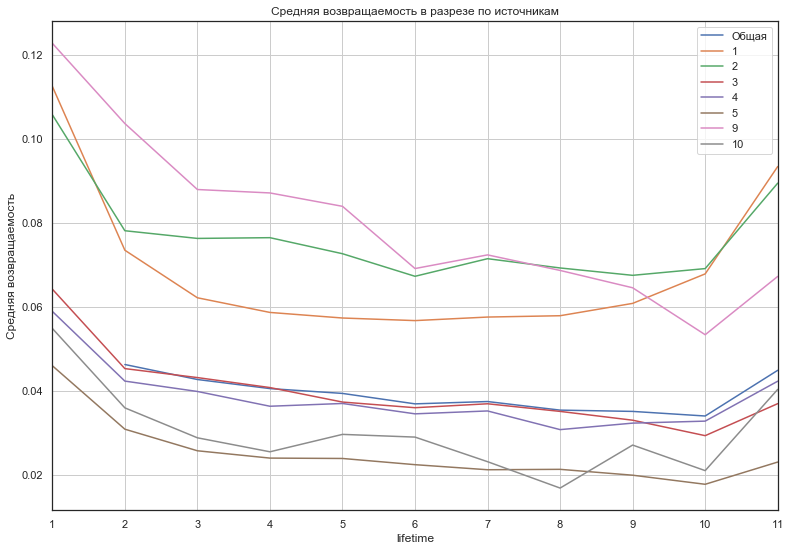

In [141]:
plt.figure(figsize=(13, 9))
        
plt.title('Средняя возвращаемость в разрезе по источникам')
plt.xlabel('lifetime')
plt.xlim(1, 11)
plt.xticks(np.arange(1, 12, 1))
plt.ylabel('Средняя возвращаемость')

legend = ['Общая']

pivot_visits_retention.mean(axis=0).plot()

for source in np.sort(visits['first_source_id'].unique()).tolist():
    if source not in [6, 7]:
        visits_retention_with_sources.query('lifetime > 0 and first_source_id == @source').pivot_table(
            index='first_activity_month',
            columns='lifetime',
            values='retention',
            aggfunc='sum'
        ).mean(axis=0).plot()

        legend.append(source)
    

plt.grid(True)
plt.legend(legend)
plt.show()

* Посетители из источников 1, 2 и 9 возвращаются в сервис чаще, чем все посетители в целом, причем с ощутимой разницей
* Источники 3 и 4 близки к показателям общей возвращаемости
* Источники 5 и 10 имеют среднюю возвращаемость ниже общих показателей

## Выводы <a id="conclusions"></a>

**Факты, из которых будем формировать выводы**

* Преобладающая платформа - desktop, основные источники визитов (по убыванию): 4, 3, 5, 2, 1, 9 и 10
* Пользователи из молодых когорт возвращаются хуже
* Средний чек молодых когорт также чуть хуже чем у более возрастных
* В среднем каждый покупатель принес по 4.6 долларов валовой прибыли за год жизни в сервисе
* В среднем клиенты не окупаются за год
* Длительность визитов: быстрые - 1 минута, средние - 7 минут, долгие - 25 минут
* Длительность покупок: быстрые - 1 минута, средние - от 13 до 22 минут, долгие - от 2 часов

В разрезе по истотчникам:

* Наибольшая сумма затрат соответствует 3-ему источнику. Он опережает своего ближайшего конкурента 4 практически в 2.5 раза. 4 и 5 источники соизмеримы по объему затрат. Меньше всего средств было затрачено на 9 и 10
* 1 (явный лидер), 2 и 10 каналы имеют наибольшую конверсионность в 1ую покупку. Из "объемных" каналов лидер под номером 3
* Самая низкая стоимость привлечения покупателя характерна источникам 9 и 10. 1, 4 и 5 источникам характерны чуть большие суммы, а вот для источников 2 и 3 стоимость привлечения самая высокая (разница между среднимим и дорогими в 2 раза)
* Клиенты из 1ого источника окупаются на 6ой месяц, а затем приносят доход. Клиенты из источников 5 и 2 наиболее близки к окупаемости, от них немного отстают клиенты из 9 и 4 источников. Клиенты из 3 и 10 - далеки от окупаемости
* Посетители из источников 1, 2 и 9 возвращаются в сервис чаще, чем все посетители в целом, причем с ощутимой разницей. 3 и 4 близки к показателям общей возвращаемости, а источники 5 и 10 - ниже общей

Значения параметров по каждому источнику можно свести в excel-таблицу

<img src="https://i.ibb.co/JpL96JX/2.jpg" alt="table" title="Таблица с параметрами источников трафика">

#### Выводы

* Со временем падает общий retention. На этот счет у меня есть 3 гипотезы:
    1. Привлекаем большой объем нецелевого трафика. Решение - изменить стратегию привлечения пользователей
    2. Не удерживаем пользователей в сервисе - пользователи не видят ценности от использования Афиши. Решение - создать условия, при которых пользователям будет выгодно покупать с помощью Афиши: скидки, баллы и прочие дополнительные профиты и удобно: оповещения, подписки на интересующих актеров/артистов и т.д.
    3. Предлагаем пользователям не то, что они хотят видеть. Изучение вкусов пользователей, трендов на рынке шоу помогут предлагать пользователям действительно то, что им интересно
* Также уменьшается показатель среднего чека для более молодых когорт. Частично решением проблемы будут предложения из пункта выше. Вряд ли кто-то покупает несколько билетов на разные мероприятия. Возможно стоит стимулировать людей ходить группами, к примеру парами. Таким образом средний чек будет выше
* Для сервиса характерны короткие визиты и не сверх быстрое принятие решения о покупке. Возможно, что пользователь не нашел ничего интересного для себя в данный момент. Стоит цеплять подобную аудиторию с помощью подписки на рассылку об интересующих новостях/ивентах, с помощью анализа просмотренных карточек событий предлагать релевантный контент

В разрезе источников

* В моем понимании источники 1 и 9 незаслуженно игнорируются маркетологами :) Кажется, нарастив объем трафика из этих источников Афиша приблизит себя к окупаемости 
* 3 канал явно не тот, куда стоит лить основную часть маркетингового бюджета. Я ничего не знаю о характере источников, но соразмерными по возможному объему привлечения выглядят 4 и 5. Думаю, что увеличив бюджет 4 (в большей части) и 5 (в меньшей части) источников и снизив затраты на 3 Афиша ещё более приблизит себя к окупаемости
* Стоимость привлечения клиентов из 10 канала практически равна текущему среднему годовому LTV. Думаю, что этот канал тоже можно использовать в качестве точки роста
* Если канал 2 сохранит стоимость привлечения пользователя на уровне мая 2018, то станет шикарной точкой роста для Афиши

## Дополнение 1. Исследование в разрезе разных типов устройств <a id="ad"></a>

В разрезе разных платформ исследуем:
    
* Как меняется средний чек
* Сколько денег приносят (LTV)

**Как меняется средний чек** <a id="ad_q1"></a>

Выделим из <code>visits</code> только первые визиты, сгруппируем эту таблицу по uid и объединим её с <code>orders</code>

In [142]:
orders = (
    orders
    .merge(visits.query('start_ts == first_visit_date').groupby('uid')['device'].first(),
    on='uid'
    )
)

orders.head()

,buy_ts,revenue,uid,order_month,order_week,order_day,first_buy_ts,first_order_month,source_id,device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,1,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2,desktop
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2,desktop
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,3,desktop


Теперь для каждого заказа известна первичная платформа визита (будем считать, что 1ый визит с платформы - источник заказа с этой платформы). Сгруппируем таблицу по типу устройства, первому и фактическому месяцам заказа

In [143]:
device_avg_check = (
    orders
    .groupby(['device', 'first_order_month', 'order_month'])
    .agg({'uid':'count', 'revenue':'sum'})
)

device_avg_check.head()

uid  revenue
device  first_order_month order_month               
desktop 2017-06-01        2017-06-01   1994  8321.37
                          2017-07-01    166   882.43
                          2017-08-01    169   844.70
                          2017-09-01    221  1905.09
                          2017-10-01    278  1992.87

Рассчитаем средний чек, как отношение выручки к числу покупателей

In [144]:
device_avg_check['avg_check'] = device_avg_check['revenue'] / device_avg_check['uid']
device_avg_check = device_avg_check.reset_index()

device_avg_check.head()

,device,first_order_month,order_month,uid,revenue,avg_check
0,desktop,2017-06-01,2017-06-01,1994,8321.37,4.173205
1,desktop,2017-06-01,2017-07-01,166,882.43,5.315843
2,desktop,2017-06-01,2017-08-01,169,844.70,4.998225
3,desktop,2017-06-01,2017-09-01,221,1905.09,8.620317
4,desktop,2017-06-01,2017-10-01,278,1992.87,7.168597


Определим lifetime

In [145]:
device_avg_check['lifetime'] = (
    ((device_avg_check['order_month'] - device_avg_check['first_order_month']) / np.timedelta64(1, 'M'))
    .round()
    .astype('int')
)

device_avg_check.head()

,device,first_order_month,order_month,uid,revenue,avg_check,lifetime
0,desktop,2017-06-01,2017-06-01,1994,8321.37,4.173205,0
1,desktop,2017-06-01,2017-07-01,166,882.43,5.315843,1
2,desktop,2017-06-01,2017-08-01,169,844.70,4.998225,2
3,desktop,2017-06-01,2017-09-01,221,1905.09,8.620317,3
4,desktop,2017-06-01,2017-10-01,278,1992.87,7.168597,4


И преобразуем дату первого заказа к строковому типу с заданным форматом

In [146]:
device_avg_check['first_order_month'] = device_avg_check['first_order_month'].dt.strftime('%Y-%m')

device_avg_check.head()

,device,first_order_month,order_month,uid,revenue,avg_check,lifetime
0,desktop,2017-06,2017-06-01,1994,8321.37,4.173205,0
1,desktop,2017-06,2017-07-01,166,882.43,5.315843,1
2,desktop,2017-06,2017-08-01,169,844.70,4.998225,2
3,desktop,2017-06,2017-09-01,221,1905.09,8.620317,3
4,desktop,2017-06,2017-10-01,278,1992.87,7.168597,4


Отлично, теперь для каждой платформы построим heatmap среднего чека

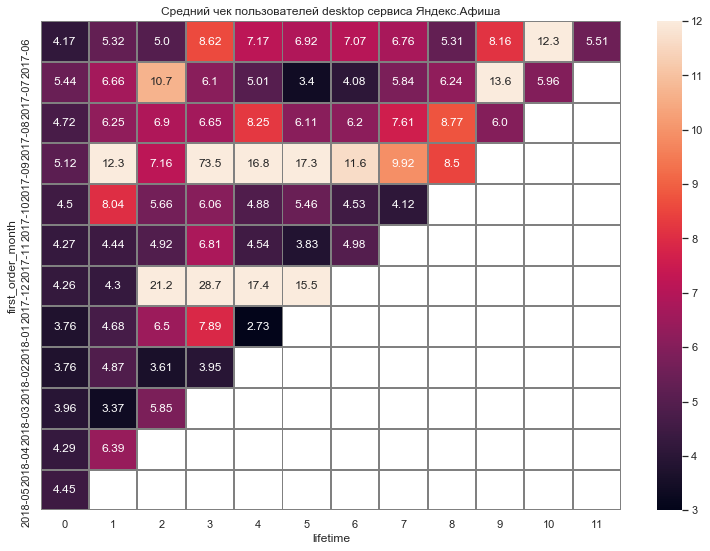

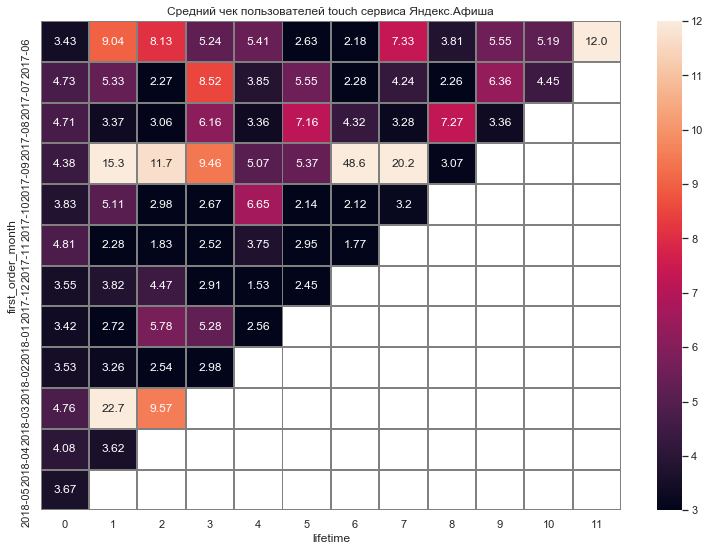

In [147]:
for device in device_avg_check['device'].unique().tolist():
    pivot_device_avg_check = pivot_cohorts_func(device_avg_check.query('device == @device'), 'avg_check')
    
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('Средний чек пользователей ' + device + ' сервиса Яндекс.Афиша')
    sns.heatmap(pivot_device_avg_check.query('first_order_month != "2018-06"'), annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin=3, vmax=12);

* Первым делом в глаза бросается контраст 2ух таблиц: desktop более светлая, touch более темная. Это говорит о том, что у пользователей desktop в целом средний чек выше, чем у пользователей touch
* При общем рассмотрении я разделил таблицу среднего чека на 2 половины - верхняя часть (когорты 09.2017 и младше) с более высоким средним чеком, а остальные с более низким. При рассмотрении в разрезе разных устройств такой вывод мне не кажется верным. Для платформы touch характерны 3 когорты: 06.2017, 09.2017 и 03.2018, которые в некоторые активные для них периоды покупают с высоким средним чеком. Остальные когорты платформы touch покупают с очень низким средним чеком
* Интересные особенности характерны для когорт 09.2017, 12.2017 и 03.2018. Когорта 09.2017 вдет себя восхитительно с точки зрения среднего чека на всех платформах. Когорты 12.2017 и 03.2018 ведут себя восхитительно только в разрезе определенных платформ desktop и touch соответственно

Для меня немного странно наблюдать подобную картину, т.к. я не понимаю природы подобных различий. Предположим, что до определенного момента Афиша на touch устройствах работала и выглядела плохо. Тогда "темный" график среднего чека для touch - норма. Но одновременно существуеют когорты 09.2017 и 03.2018, которых этот факт нисколько не интересует и они покупают с высоким средним чеком на touch

**Сколько денег приносят (LTV)** <a id="ad_q2"></a>

В таблице <code>orders</code> уже присутствует информация о платформах. Сгруппируем <code>orders</code> по типу устройств, первой и фактической датам заказа

In [148]:
cohorts_orders_with_devices = (
    orders
    .groupby(['device', 'first_order_month', 'order_month'])
    .agg({'uid':'nunique', 'revenue':'sum'})
    .reset_index()
)

cohorts_orders_with_devices.head()

,device,first_order_month,order_month,uid,revenue
0,desktop,2017-06-01,2017-06-01,1702,8321.37
1,desktop,2017-06-01,2017-07-01,51,882.43
2,desktop,2017-06-01,2017-08-01,45,844.70
3,desktop,2017-06-01,2017-09-01,52,1905.09
4,desktop,2017-06-01,2017-10-01,81,1992.87


Определим lifetime

In [149]:
cohorts_orders_with_devices['lifetime'] = (
    ((cohorts_orders_with_devices['order_month'] - cohorts_orders_with_devices['first_order_month']) / np.timedelta64(1, 'M'))
    .round()
    .astype('int')
)

cohorts_orders_with_devices.head()

,device,first_order_month,order_month,uid,revenue,lifetime
0,desktop,2017-06-01,2017-06-01,1702,8321.37,0
1,desktop,2017-06-01,2017-07-01,51,882.43,1
2,desktop,2017-06-01,2017-08-01,45,844.70,2
3,desktop,2017-06-01,2017-09-01,52,1905.09,3
4,desktop,2017-06-01,2017-10-01,81,1992.87,4


Найдем кол-во человек на 0 lifetime для каждой когорты в разрезе типов устройств

In [150]:
cohorts_orders_wd_sizes = cohorts_orders_with_devices.query('lifetime == 0')[['device', 'first_order_month', 'uid']]
cohorts_orders_wd_sizes = cohorts_orders_wd_sizes.rename(columns=({'uid':'n_buyers'}))

cohorts_orders_wd_sizes.head()

,device,first_order_month,n_buyers
0,desktop,2017-06-01,1702
12,desktop,2017-07-01,1526
23,desktop,2017-08-01,1114
33,desktop,2017-09-01,2059
42,desktop,2017-10-01,3532


Объединим таблицы

In [151]:
cohorts_orders_with_devices = cohorts_orders_with_devices.merge(cohorts_orders_wd_sizes, on=['device', 'first_order_month'])

cohorts_orders_with_devices.head()

,device,first_order_month,order_month,uid,revenue,lifetime,n_buyers
0,desktop,2017-06-01,2017-06-01,1702,8321.37,0,1702
1,desktop,2017-06-01,2017-07-01,51,882.43,1,1702
2,desktop,2017-06-01,2017-08-01,45,844.70,2,1702
3,desktop,2017-06-01,2017-09-01,52,1905.09,3,1702
4,desktop,2017-06-01,2017-10-01,81,1992.87,4,1702


Определим выручку

In [152]:
cohorts_orders_with_devices['gp'] = cohorts_orders_with_devices['revenue'] * margin_rate

cohorts_orders_with_devices.head()

,device,first_order_month,order_month,uid,revenue,lifetime,n_buyers,gp
0,desktop,2017-06-01,2017-06-01,1702,8321.37,0,1702,4160.685
1,desktop,2017-06-01,2017-07-01,51,882.43,1,1702,441.215
2,desktop,2017-06-01,2017-08-01,45,844.70,2,1702,422.350
3,desktop,2017-06-01,2017-09-01,52,1905.09,3,1702,952.545
4,desktop,2017-06-01,2017-10-01,81,1992.87,4,1702,996.435


Наконец рассчитаем LTV

In [153]:
cohorts_orders_with_devices['ltv'] = cohorts_orders_with_devices['gp'] / cohorts_orders_with_devices['n_buyers']

cohorts_orders_with_devices.head()

,device,first_order_month,order_month,uid,revenue,lifetime,n_buyers,gp,ltv
0,desktop,2017-06-01,2017-06-01,1702,8321.37,0,1702,4160.685,2.444586
1,desktop,2017-06-01,2017-07-01,51,882.43,1,1702,441.215,0.259233
2,desktop,2017-06-01,2017-08-01,45,844.70,2,1702,422.350,0.248149
3,desktop,2017-06-01,2017-09-01,52,1905.09,3,1702,952.545,0.559662
4,desktop,2017-06-01,2017-10-01,81,1992.87,4,1702,996.435,0.585449


Преобразуем даты в first_order_month к строковому типу с заданным форматом

In [154]:
cohorts_orders_with_devices['first_order_month'] = cohorts_orders_with_devices['first_order_month'].dt.strftime('%Y-%m')

cohorts_orders_with_devices.head()

,device,first_order_month,order_month,uid,revenue,lifetime,n_buyers,gp,ltv
0,desktop,2017-06,2017-06-01,1702,8321.37,0,1702,4160.685,2.444586
1,desktop,2017-06,2017-07-01,51,882.43,1,1702,441.215,0.259233
2,desktop,2017-06,2017-08-01,45,844.70,2,1702,422.350,0.248149
3,desktop,2017-06,2017-09-01,52,1905.09,3,1702,952.545,0.559662
4,desktop,2017-06,2017-10-01,81,1992.87,4,1702,996.435,0.585449


Теперь для каждой платформы визуализируем LTV в виде сводной. Для платформы desktop

In [155]:
pivot_cohorts_func(cohorts_orders_with_devices.query('device == "desktop"'), 'ltv').round(3).fillna(' ')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,2.445,0.259,0.248,0.56,0.585,0.433,0.561,0.343,0.324,0.345,0.333,0.128
2017-07,3.070,0.183,0.385,0.162,0.089,0.08,0.068,0.073,0.092,0.08,0.082,
2017-08,2.628,0.275,0.26,0.224,0.296,0.145,0.114,0.236,0.173,0.105,,
2017-09,2.899,0.463,0.207,2.428,0.241,0.382,0.263,0.118,0.109,,,
2017-10,2.565,0.28,0.104,0.09,0.078,0.07,0.049,0.064,,,,
2017-11,2.498,0.224,0.115,0.19,0.081,0.03,0.067,,,,,
2017-12,2.441,0.141,0.571,0.66,0.194,0.208,,,,,,
2018-01,2.105,0.172,0.181,0.081,0.036,,,,,,,
2018-02,2.094,0.158,0.046,0.045,,,,,,,,


Построим тепловую карту без 0 lifetime для платформы desktop

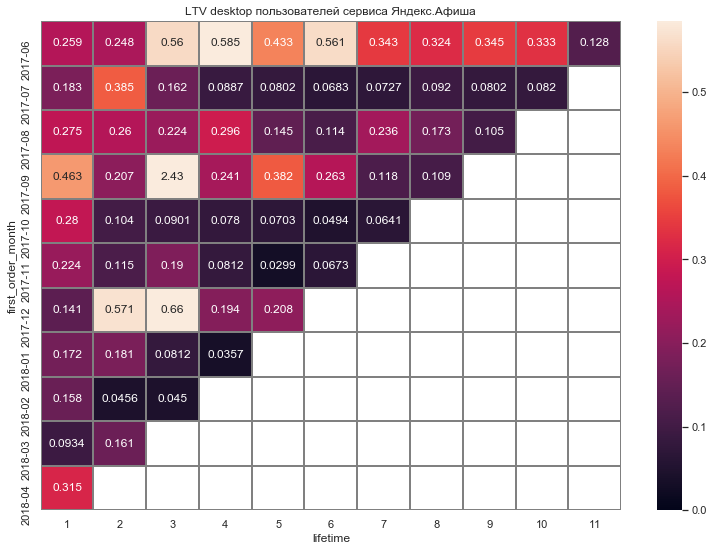

In [156]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV desktop пользователей сервиса Яндекс.Афиша')
sns.heatmap(pivot_cohorts_func(cohorts_orders_with_devices.query('device == "desktop" and lifetime != 0'), 'ltv'), annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin=0, vmax=0.585);

И для платформы touch

In [157]:
pivot_cohorts_func(cohorts_orders_with_devices.query('device == "touch"'), 'ltv').round(3).fillna(' ')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.925,0.155,0.063,0.041,0.118,0.02,0.02,0.011,0.024,0.078,0.032,0.131
2017-07,2.756,0.107,0.029,0.247,0.087,0.07,0.029,0.064,0.037,0.048,0.062,
2017-08,2.684,0.066,0.096,0.072,0.033,0.126,0.068,0.058,0.028,0.046,,
2017-09,2.521,0.935,0.471,0.254,0.039,0.093,0.698,0.136,0.024,,,
2017-10,2.225,0.215,0.059,0.028,0.066,0.016,0.012,0.03,,,,
2017-11,2.926,0.093,0.032,0.043,0.042,0.014,0.014,,,,,
2017-12,2.086,0.086,0.035,0.03,0.007,0.015,,,,,,
2018-01,1.926,0.054,0.041,0.034,0.015,,,,,,,
2018-02,2.026,0.077,0.018,0.011,,,,,,,,


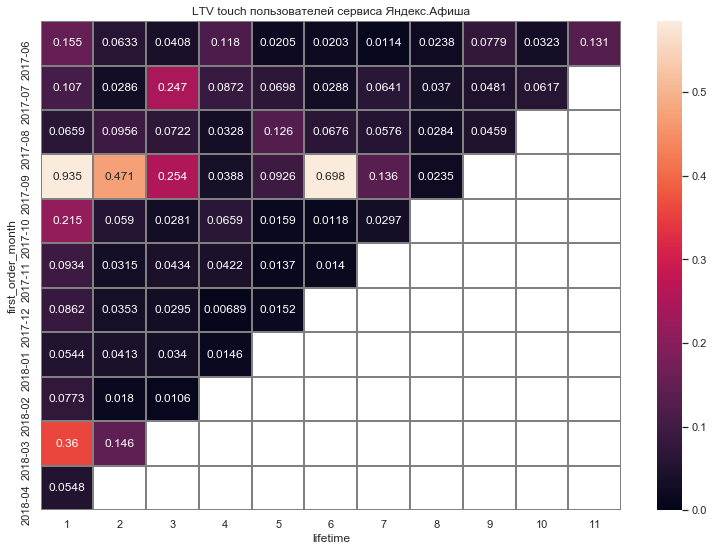

In [158]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV touch пользователей сервиса Яндекс.Афиша')
sns.heatmap(pivot_cohorts_func(cohorts_orders_with_devices.query('device == "touch" and lifetime != 0'), 'ltv'), annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin=0, vmax=0.585);

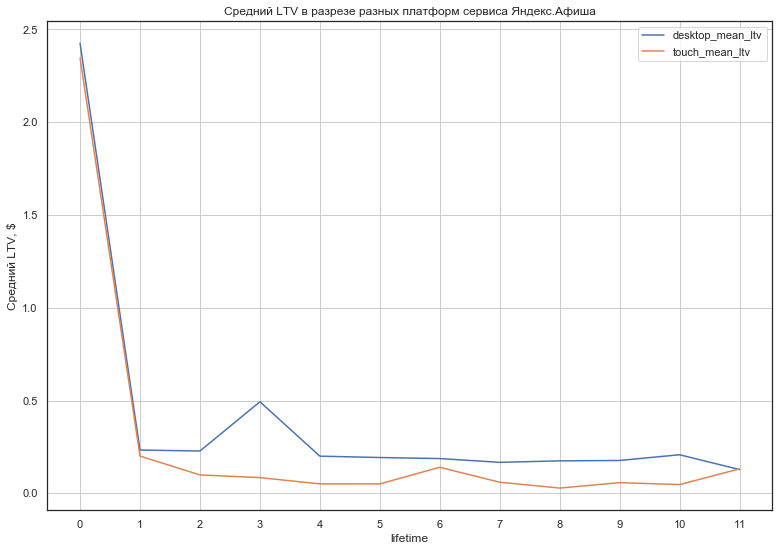

In [159]:
pivot_cohorts_func(
    cohorts_orders_with_devices
    .query('device == "desktop"'), 'ltv', 'mean', 0)[1].rename(columns={0:'desktop_mean_ltv'}
    ).merge(
        pivot_cohorts_func(
            cohorts_orders_with_devices
            .query('device == "touch"'), 'ltv', 'mean', 0)[1].rename(columns={0:'touch_mean_ltv'}),
            on='lifetime'
    ).plot(x='lifetime', y=['desktop_mean_ltv', 'touch_mean_ltv'], figsize=(13, 9))

plt.title('Средний LTV в разрезе разных платформ сервиса Яндекс.Афиша')
plt.xlabel('lifetime')
plt.xticks(range(0, 12, 1))
plt.ylabel('Средний LTV, $')
plt.grid(True)
plt.legend()
plt.show()

Ситуация на тепловых картах похожа на средний чек: для touch характерен низкий LTV относительно платформы desktop, кроме когорт 09.2017 и 03.2018. Для desktop платфором, если исключить когорту 12.2017, ситуация ухудшается - более молодые когорты имеют более низкий LTV, чем их старшие братья

Также средний LTV выше для платформы desktop и его вид - прямая, параллельная оси X. Если свести расходы этой платформы к этому значению, то экономика начнет сходиться. Для платформы touch характерно падение LTV практически до нуля к 8 lifetime. На увеличение LTV в 11 liftetime не стоит обращать внимание, т.к. это лишь месячное значение самой возрастной когорты

### Выводы <a id="ad_q3"></a>

* У пользователей desktop средний чек выше, чем у пользователей touch
* Для платформы touch характерны 3 когорты: 06.2017, 09.2017 и 03.2018, которые в некоторые активные для них периоды покупают с высоким средним чеком. Остальные покупают с очень низким чеком
* Для touch характерен низкий LTV относительно платформы desktop
* Для desktop платфором, если исключить когорту 12.2017, ситуация ухудшается - более молодые когорты имеют более низкий LTV по сравнению с более старшими
* Средний LTV выше для платформы desktop и его вид - прямая, параллельная оси X. Для платформы touch характерно падение ltv практически до нуля к 8 lifetime

Основной платформой для Афиши является платформа desktop: у пользователей этой платформы выше средний чек покупки, они приносят больше денег в течение жизни